# Vidio Sentiment Analyzer : Unveiling User Sentiments in Google Play Reviews

`Vidio Sentiment Analyzer: Mengungkap Sentimen Pengguna dalam Ulasan Google Play` merupakan pendekatan inovatif untuk mengidentifikasi pola-pola utama dalam kumpulan ulasan pengguna. Di era informasi digital yang berkembang pesat seperti sekarang, sangat penting bagi Vidio sebagai platform terkemuka untuk mengetahui dan memahami isu-isu utama yang diungkapkan oleh pengguna.

`Sentiment Analyzer` menggunakan teknik canggih untuk memahami sentimen yang mendominasi dalam ulasan Google Play. Dengan volume feedback pengguna yang besar, menjadi sangat penting bagi Vidio untuk mendapatkan wawasan tentang sentimen pengguna.

Penerapan analisis sentimen memungkinkan Vidio mengkategorikan ulasan pengguna menjadi sentimen positif dan negatif memungkinkan pemahaman yang lebih mendalam tentang pengalaman dan preferensi pengguna. Metrik evaluasi yang relevan dapat mencakup distribusi polaritas sentimen, intensitas sentimen, dan tren sentimen dari waktu ke waktu.

Dalam konteks ini, metrik evaluasi kunci dapat melibatkan metrik-metrik standar analisis sentimen seperti akurasi, precision, recall, dan F1 Score. Metrik-metrik ini memberikan pandangan komprehensif tentang seberapa baik Sentiment Analyzer dalam mengklasifikasikan sentimen pengguna dengan akurat.

Wawasan yang diperoleh dari Sentiment Analyzer dapat memberdayakan Vidio untuk meningkatkan kepuasan pengguna, memprioritaskan perbaikan fitur, dan menanggapi masalah dengan cepat. Dengan fokus pada sentimen pengguna, Vidio dapat secara strategis menyelaraskan upayanya untuk memenuhi harapan pengguna dan menjaga pengalaman pengguna yang positif.

Melalui Vidio Sentiment Analyzer, Vidio dapat menavigasi lanskap dinamis opini pengguna di platform Google Play, memungkinkan pengambilan keputusan yang berbasis informasi dan langkah-langkah proaktif untuk meningkatkan kepuasan pengguna.

# Data Preparation

## Import Library

In [1]:
import pandas as pd
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import pycrfsuite 
# Download data NLTK
nltk.download('stopwords')
nltk.download('wordnet')
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tag import CRFTagger
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Gathering

Data yang digunakan merupakan data yang diambil atau discrapping dari google play pada aplikasi Vidio mulai tanggal 2020-08-03 - 2023-12-20 sebanyak 10000 rows

In [2]:
# Read Data
data = pd.read_csv('dataset/data_vidio.csv')
# sanity check
data

,content,score,at,sentiment
0,"Sekarang banyak iklan nya, nonton sinetron, dr...",1,2023-12-20 03:03:49,Negatif
1,Vidio lagi knp sih?? Tayangan EPL nya loading ...,3,2023-12-10 23:45:09,Negatif
2,Kenapa sudah berlangganan tapi masih muncul ik...,2,2023-12-10 21:01:34,Negatif
3,"Kualitas video nya jangan otomatis dong,kalau ...",1,2023-12-07 17:42:09,Negatif
4,"Kenapa ya sy mau beli paketnya ga bisa2, alesa...",1,2023-12-12 22:05:49,Negatif
...,...,...,...,...
9995,Agak lemot sih tapi bagus kok kalau mati lampu...,5,2018-12-05 11:38:33,Positif
9996,Aplikasi nggk guna buang2 kuota aj kirain grat...,1,2020-04-15 15:52:46,Negatif
9997,Saya suka banget sama aplikasi Vidio ini karen...,4,2020-10-17 20:16:41,Positif
9998,Sangat baguss tapi kenapa yah kalau buka video...,5,2018-10-27 17:39:24,Positif


## Data Definition

Data yang digunakan merupakan data yang diambil atau discrap dari google play review aplikasi vidio dengan jumlah data sebesar 10000 rows dan 3 kolom, berikut definisi masing masing kolomnya

- `content`: content merupakan komentar atau review yang diberikan para user untuk aplikasi vidio di google play store
- `score`: score merupakan penilaian dari user dengan skala 1-5, semakin tinggi nilainya maka akan semakin reviewnya, dan semakin rendah maka akan semakin buruk reviewnya.
- `at`: at merupakan tanggal saat user melakukan atau mengirim review di google play store
- `sentiment`: sentiment merupakan akumulasi dari score, jika score memiliki nilai dibawah atau sama dengan tiga maka dapat disimpulkan sentimennya negatif dan jika score memiliki nilai diatas 3 maka dapat disimpulkan sentimentnya positif

## Data Validation

Proses mengevaluasi dan memvalidasi integritas, kualitas, dan kecocokan data yang digunakan dalam proses pembangunan dan evaluasi model machine learning. Hal ini bertujuan untuk memastikan bahwa data yang digunakan memenuhi persyaratan dan standar yang diperlukan untuk menghasilkan model yang akurat dan dapat diandalkan.

### Cek Informasi Data

In [3]:
# Check informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    10000 non-null  object
 1   score      10000 non-null  int64 
 2   at         10000 non-null  object
 3   sentiment  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [4]:
# Mengubah tipe data kolom "at" menjadi datetime dengan format yang diinginkan
data['at'] = pd.to_datetime(data['at'], format='%Y-%m-%d %H:%M:%S')

In [5]:
# Ekstraksi tanggal, jam, dan menit
data['event_date'] = data['at'].dt.date
data['event_hour'] = data['at'].dt.hour
data['event_minute'] = data['at'].dt.minute

In [6]:
# sanityy check
data

,content,score,at,sentiment,event_date,event_hour,event_minute
0,"Sekarang banyak iklan nya, nonton sinetron, dr...",1,2023-12-20 03:03:49,Negatif,2023-12-20,3,3
1,Vidio lagi knp sih?? Tayangan EPL nya loading ...,3,2023-12-10 23:45:09,Negatif,2023-12-10,23,45
2,Kenapa sudah berlangganan tapi masih muncul ik...,2,2023-12-10 21:01:34,Negatif,2023-12-10,21,1
3,"Kualitas video nya jangan otomatis dong,kalau ...",1,2023-12-07 17:42:09,Negatif,2023-12-07,17,42
4,"Kenapa ya sy mau beli paketnya ga bisa2, alesa...",1,2023-12-12 22:05:49,Negatif,2023-12-12,22,5
...,...,...,...,...,...,...,...
9995,Agak lemot sih tapi bagus kok kalau mati lampu...,5,2018-12-05 11:38:33,Positif,2018-12-05,11,38
9996,Aplikasi nggk guna buang2 kuota aj kirain grat...,1,2020-04-15 15:52:46,Negatif,2020-04-15,15,52
9997,Saya suka banget sama aplikasi Vidio ini karen...,4,2020-10-17 20:16:41,Positif,2020-10-17,20,16
9998,Sangat baguss tapi kenapa yah kalau buka video...,5,2018-10-27 17:39:24,Positif,2018-10-27,17,39


In [7]:
# sanity check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   content       10000 non-null  object        
 1   score         10000 non-null  int64         
 2   at            10000 non-null  datetime64[ns]
 3   sentiment     10000 non-null  object        
 4   event_date    10000 non-null  object        
 5   event_hour    10000 non-null  int32         
 6   event_minute  10000 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(3)
memory usage: 468.9+ KB


In [8]:
data['event_date'] = pd.to_datetime(data['event_date'])

In [9]:
data

,content,score,at,sentiment,event_date,event_hour,event_minute
0,"Sekarang banyak iklan nya, nonton sinetron, dr...",1,2023-12-20 03:03:49,Negatif,2023-12-20,3,3
1,Vidio lagi knp sih?? Tayangan EPL nya loading ...,3,2023-12-10 23:45:09,Negatif,2023-12-10,23,45
2,Kenapa sudah berlangganan tapi masih muncul ik...,2,2023-12-10 21:01:34,Negatif,2023-12-10,21,1
3,"Kualitas video nya jangan otomatis dong,kalau ...",1,2023-12-07 17:42:09,Negatif,2023-12-07,17,42
4,"Kenapa ya sy mau beli paketnya ga bisa2, alesa...",1,2023-12-12 22:05:49,Negatif,2023-12-12,22,5
...,...,...,...,...,...,...,...
9995,Agak lemot sih tapi bagus kok kalau mati lampu...,5,2018-12-05 11:38:33,Positif,2018-12-05,11,38
9996,Aplikasi nggk guna buang2 kuota aj kirain grat...,1,2020-04-15 15:52:46,Negatif,2020-04-15,15,52
9997,Saya suka banget sama aplikasi Vidio ini karen...,4,2020-10-17 20:16:41,Positif,2020-10-17,20,16
9998,Sangat baguss tapi kenapa yah kalau buka video...,5,2018-10-27 17:39:24,Positif,2018-10-27,17,39


In [10]:
# sanity check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   content       10000 non-null  object        
 1   score         10000 non-null  int64         
 2   at            10000 non-null  datetime64[ns]
 3   sentiment     10000 non-null  object        
 4   event_date    10000 non-null  datetime64[ns]
 5   event_hour    10000 non-null  int32         
 6   event_minute  10000 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(1), object(2)
memory usage: 468.9+ KB


In [11]:
data = data.sort_values(by='event_date')

In [12]:
data

,content,score,at,sentiment,event_date,event_hour,event_minute
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,1,2018-09-15 08:17:04,Negatif,2018-09-15,8,17
8625,lumayan bagus tapi tolong di perbaiki gangguan...,5,2018-09-15 15:50:21,Positif,2018-09-15,15,50
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,5,2018-09-15 14:33:19,Positif,2018-09-15,14,33
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",1,2018-09-19 02:10:42,Negatif,2018-09-19,2,10
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",2,2018-09-20 09:13:09,Negatif,2018-09-20,9,13
...,...,...,...,...,...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,1,2023-12-29 04:32:05,Negatif,2023-12-29,4,32
626,Saya menyesal berlanggan vidio karena pembayar...,1,2023-12-29 20:19:22,Negatif,2023-12-29,20,19
1851,tolong apknya di update dong masa gak ada film...,1,2023-12-29 13:37:03,Negatif,2023-12-29,13,37
59,masa nonton premier league vidionya lebih lamb...,1,2023-12-29 18:35:41,Negatif,2023-12-29,18,35


### Check Nilai Null
Mengecek apakah data terdapat nilai null pada setiap kolom

In [13]:
#Menghitung nilai null pada kolom
data.isnull().sum()

content         0
score           0
at              0
sentiment       0
event_date      0
event_hour      0
event_minute    0
dtype: int64

### Melihat statistik deskriptif dan Range Data Numerikal

Cek statistika deskriptif

In [14]:
#Melihat statistika deskriptif dengan describe()
data.describe()

,score,at,event_date,event_hour,event_minute
count,10000.000000,10000,10000,10000.000000,10000.000000
mean,2.277700,2022-05-10 04:13:30.026399744,2022-05-09 13:16:45.120000256,14.446700,29.457400
min,1.000000,2018-09-15 08:17:04,2018-09-15 00:00:00,0.000000,0.000000
25%,1.000000,2021-03-21 17:04:09.750000128,2021-03-21 00:00:00,10.000000,14.000000
50%,1.000000,2022-09-15 18:43:19.500000,2022-09-15 00:00:00,16.000000,30.000000
75%,4.000000,2023-08-26 21:09:23.750000128,2023-08-26 00:00:00,20.000000,44.000000
max,5.000000,2023-12-29 20:23:59,2023-12-29 00:00:00,23.000000,59.000000
std,1.564745,NaN,NaN,6.758855,17.342516


### Melihat Dimensi Data

In [15]:
data.shape

(10000, 7)

In [16]:
data.sentiment.value_counts()

sentiment
Negatif    7461
Positif    2539
Name: count, dtype: int64

# Exploratory Data Analysis

In [38]:
df = data.copy()

### Distribusi Skor (Rating) Aplikasi Vidio

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


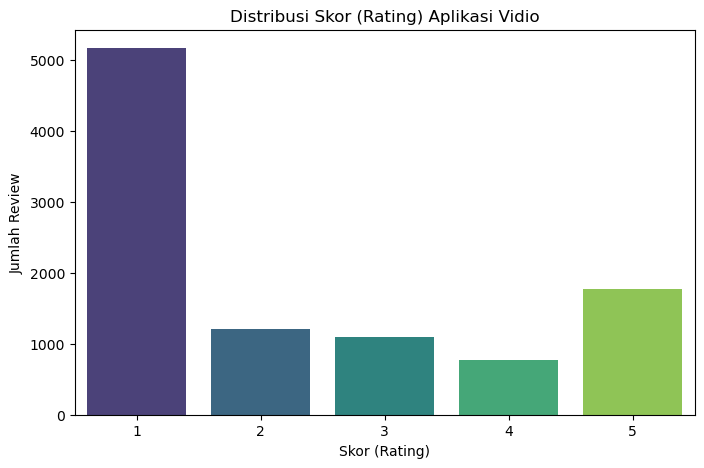

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi Skor
plt.figure(figsize=(8, 5))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Distribusi Skor (Rating) Aplikasi Vidio')
plt.xlabel('Skor (Rating)')
plt.ylabel('Jumlah Review')
plt.show()

## Distribusi Sentimen Aplikasi Vidio

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


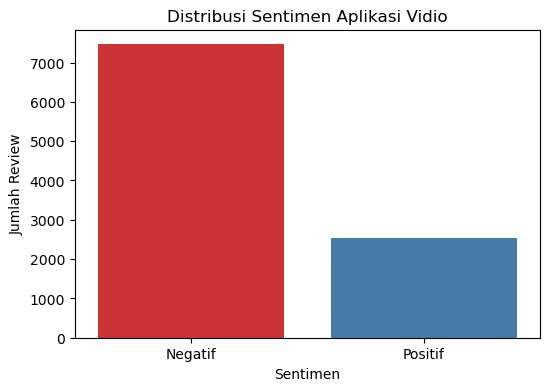

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi Sentimen
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='Set1')
plt.title('Distribusi Sentimen Aplikasi Vidio')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Review')
plt.show()

### Tren Sentimen Aplikasi Vidio seiring Waktu

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

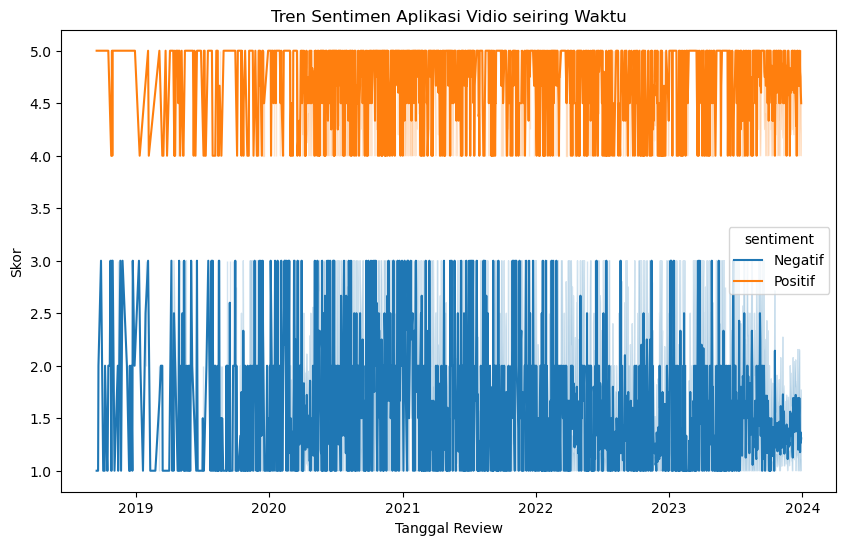

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tren Sentimen seiring Waktu
plt.figure(figsize=(10, 6))
sns.lineplot(x='event_date', y='score', hue='sentiment', data=df)
plt.title('Tren Sentimen Aplikasi Vidio seiring Waktu')
plt.xlabel('Tanggal Review')
plt.ylabel('Skor')
plt.show()

## Distribusi Panjang Kata pada Ulasan

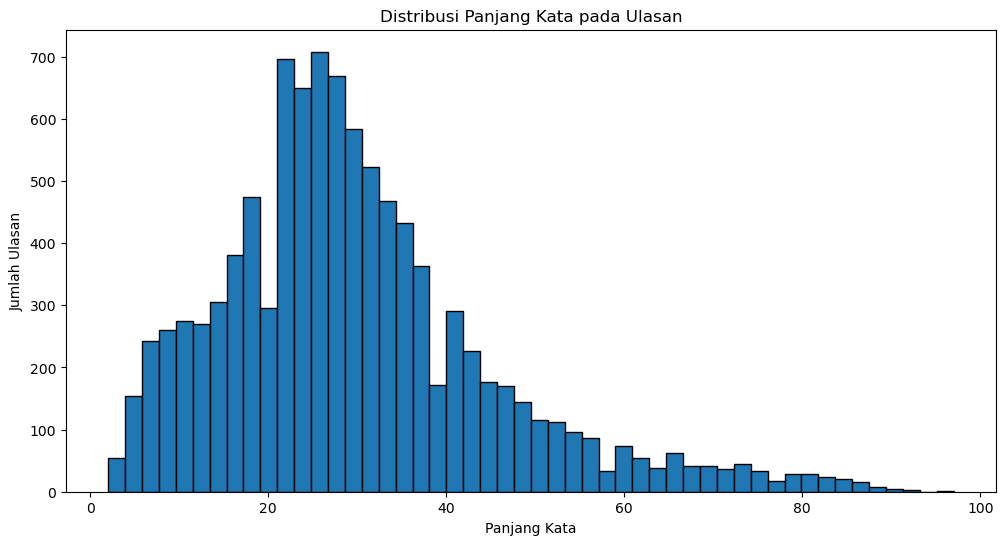

In [54]:
import matplotlib.pyplot as plt

# Menghitung panjang kata pada setiap ulasan
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

# Membuat histogram distribusi panjang kata
plt.figure(figsize=(12, 6))
plt.hist(df['word_count'], bins=50, edgecolor='black')
plt.title('Distribusi Panjang Kata pada Ulasan')
plt.xlabel('Panjang Kata')
plt.ylabel('Jumlah Ulasan')
plt.show()

### Cek Panjang Kata Ulasan

In [43]:
# Menambahkan kolom 'word_count' yang berisi jumlah kata dalam setiap ulasan
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

# Mencetak jumlah kata minimal dan maksimal
min_word_count = df['word_count'].min()
max_word_count = df['word_count'].max()

print(f"Jumlah kata minimal: {min_word_count}")
print(f"Jumlah kata maksimal: {max_word_count}")

Jumlah kata minimal: 2
Jumlah kata maksimal: 97


In [55]:
# Menambahkan kolom 'word_count' yang berisi jumlah kata dalam setiap ulasan
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

# Memfilter baris yang memiliki jumlah kata antara 2 dan 10
filtered_rows = df[(df['word_count'] >= 2) & (df['word_count'] <= 5)]

In [57]:
# Sanity Check
filtered_rows

,content,score,at,sentiment,event_date,event_hour,event_minute,word_count
7469,Iklan nya gila banyak banget...,2,2023-07-14 18:37:17,Negatif,2023-07-14,18,37,5
8502,Sangat menghibur tapi banyak iklan,5,2023-07-29 08:46:03,Positif,2023-07-29,8,46,5
6829,apk mantap.. tapi kebanyakkan iklannya,5,2023-08-09 23:38:01,Positif,2023-08-09,23,38,5
3281,"Iklan banyak, gangguan sering",1,2023-08-13 15:17:06,Negatif,2023-08-13,15,17,4
3531,Soalnya agak banyak iklan nya,4,2023-08-15 17:42:44,Positif,2023-08-15,17,42,5
...,...,...,...,...,...,...,...,...
3926,Bagus! Banyak yg free 😁😁😁,4,2023-12-28 11:51:31,Positif,2023-12-28,11,51,5
3868,Kebanyakan iklan bikin orang kesel,1,2023-12-28 22:18:58,Negatif,2023-12-28,22,18,5
3075,Streaming lancar mantap,5,2023-12-28 03:33:32,Positif,2023-12-28,3,33,3
592,kebanyakan iklan loding nya lama,1,2023-12-28 22:00:33,Negatif,2023-12-28,22,0,5


## Distribusi Jam Review dalam sehari

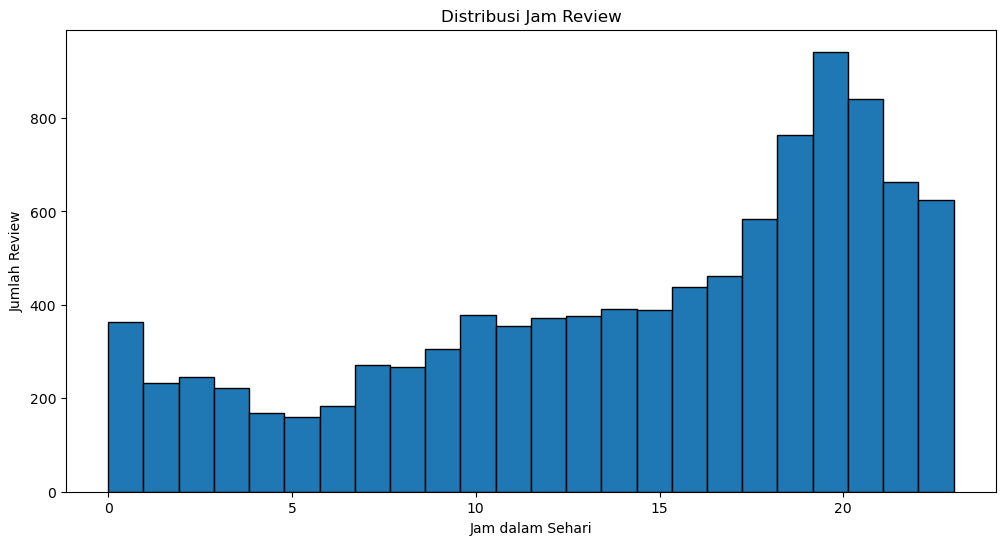

In [48]:
import matplotlib.pyplot as plt

# Membuat histogram pola jam review
plt.figure(figsize=(12, 6))
df['event_hour'].plot(kind='hist', bins=24, edgecolor='black')
plt.title('Distribusi Jam Review')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Review')
plt.show()


### Distribusi Menit Review dalam Sejam

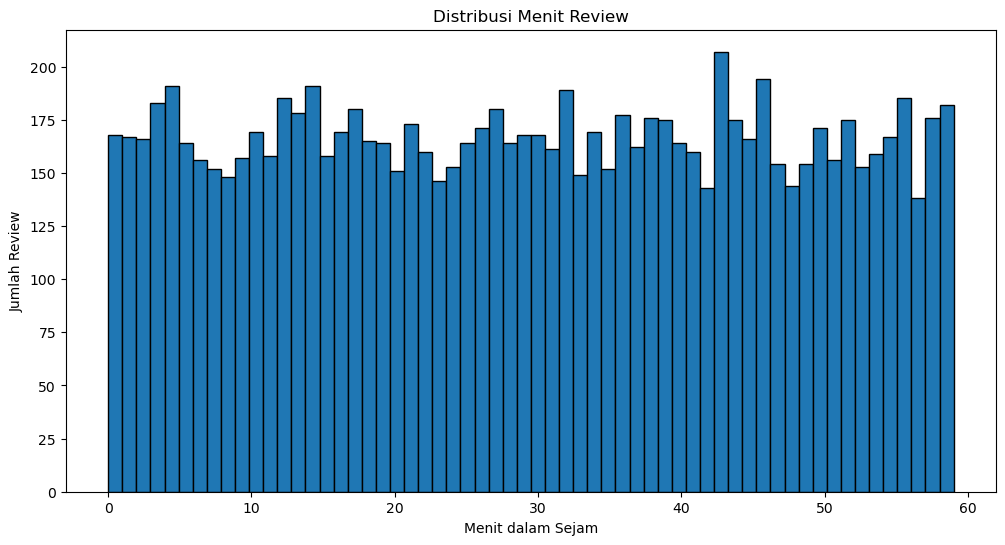

In [50]:
import matplotlib.pyplot as plt

# Membuat histogram pola menit review
plt.figure(figsize=(12, 6))
df['event_minute'].plot(kind='hist', bins=60, edgecolor='black')
plt.title('Distribusi Menit Review')
plt.xlabel('Menit dalam Sejam')
plt.ylabel('Jumlah Review')
plt.show()

## Wordcloud Sentiment Positif dan Negatif

C:\Users\hp\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


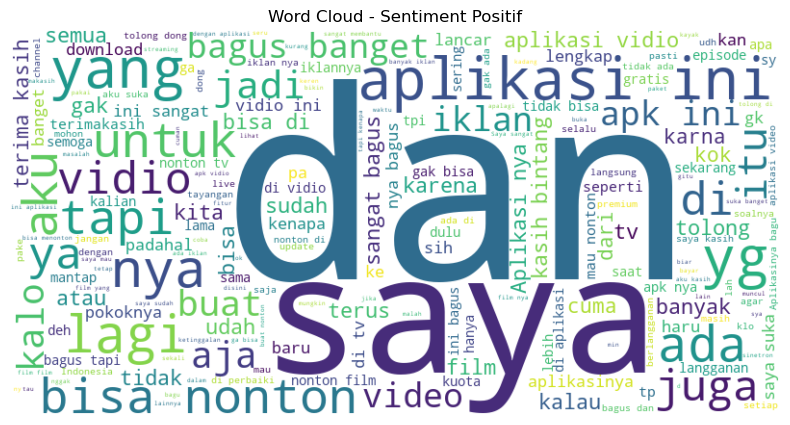

C:\Users\hp\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


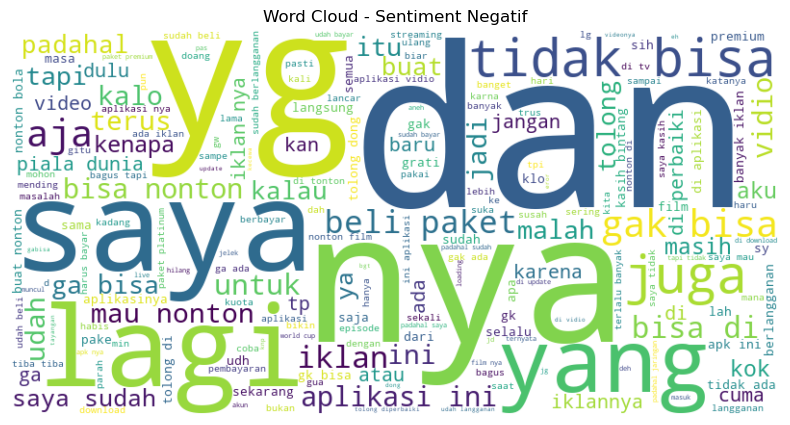

In [51]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Pilih data dengan sentiment positif
positive_reviews = df[df['sentiment'] == 'Positif']['content']

# Gabungkan semua kata dalam reviews positif
positive_text = ' '.join(positive_reviews)

# Buat Word Cloud untuk sentiment positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Tampilkan Word Cloud untuk sentiment positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentiment Positif')
plt.show()

# Pilih data dengan sentiment negatif
negative_reviews = df[df['sentiment'] == 'Negatif']['content']

# Gabungkan semua kata dalam reviews negatif
negative_text = ' '.join(negative_reviews)

# Buat Word Cloud untuk sentiment negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Tampilkan Word Cloud untuk sentiment negatif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentiment Negatif')
plt.show()


In [61]:
!pip install sastrawi

                                              0.0/209.7 kB ? eta -:--:--
     --------------------                   112.6/209.7 kB 3.3 MB/s eta 0:00:01
     -------------------------------------  204.8/209.7 kB 4.1 MB/s eta 0:00:01
     -------------------------------------- 209.7/209.7 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
nltk.download('stopwords')

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mengabaikan stopwords
stop_words = set(stopwords.words('indonesian'))

# Menghitung kata-kata pada sentimen positif dengan stemming dan tanpa stopwords
positive_reviews = df[df['sentiment'] == 'Positif']['content']
positive_text = ' '.join(positive_reviews)
positive_words = [stemmer.stem(word) for word in positive_text.split() if word.lower() not in stop_words]
positive_word_counts = Counter(positive_words)

# Menampilkan kata-kata yang sering muncul pada sentimen positif
print("Kata-kata yang sering muncul pada Sentimen Positif:")
print(positive_word_counts.most_common(10))  # Ganti 10 dengan jumlah kata-kata yang ingin ditampilkan

# Menghitung kata-kata pada sentimen negatif dengan stemming dan tanpa stopwords
negative_reviews = df[df['sentiment'] == 'Negatif']['content']
negative_text = ' '.join(negative_reviews)
negative_words = [stemmer.stem(word) for word in negative_text.split() if word.lower() not in stop_words]
negative_word_counts = Counter(negative_words)

# Menampilkan kata-kata yang sering muncul pada sentimen negatif
print("\nKata-kata yang sering muncul pada Sentimen Negatif:")
print(negative_word_counts.most_common(10))  # Ganti 10 dengan jumlah kata-kata yang ingin ditampilkan

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Perbandingan Sentimen Positif dan Negatif Berdasarkan Waktu

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

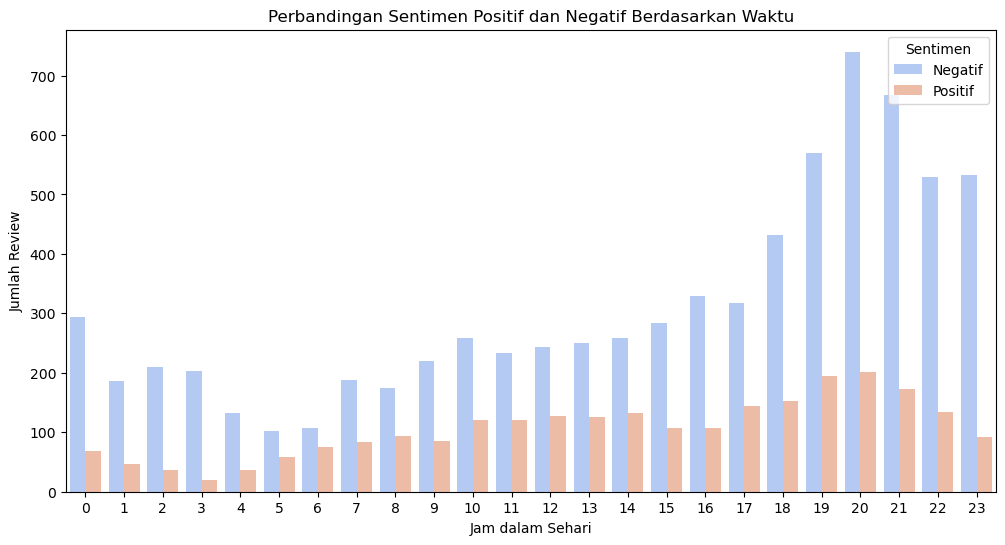

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat countplot untuk melihat perbandingan sentimen positif dan negatif berdasarkan waktu
plt.figure(figsize=(12, 6))
sns.countplot(x='event_hour', hue='sentiment', data=df, palette='coolwarm')
plt.title('Perbandingan Sentimen Positif dan Negatif Berdasarkan Waktu')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Review')
plt.legend(title='Sentimen', loc='upper right')
plt.show()


## Data Preprocessing

In [38]:
data

,content,score,at,sentiment,event_date,event_hour,event_minute
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,1,2018-09-15 08:17:04,Negatif,2018-09-15,8,17
8625,lumayan bagus tapi tolong di perbaiki gangguan...,5,2018-09-15 15:50:21,Positif,2018-09-15,15,50
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,5,2018-09-15 14:33:19,Positif,2018-09-15,14,33
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",1,2018-09-19 02:10:42,Negatif,2018-09-19,2,10
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",2,2018-09-20 09:13:09,Negatif,2018-09-20,9,13
...,...,...,...,...,...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,1,2023-12-29 04:32:05,Negatif,2023-12-29,4,32
626,Saya menyesal berlanggan vidio karena pembayar...,1,2023-12-29 20:19:22,Negatif,2023-12-29,20,19
1851,tolong apknya di update dong masa gak ada film...,1,2023-12-29 13:37:03,Negatif,2023-12-29,13,37
59,masa nonton premier league vidionya lebih lamb...,1,2023-12-29 18:35:41,Negatif,2023-12-29,18,35


In [39]:
data_preproc = data[['content','sentiment']]
data_preproc

,content,sentiment
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,Negatif
8625,lumayan bagus tapi tolong di perbaiki gangguan...,Positif
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,Positif
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",Negatif
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",Negatif
...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,Negatif
626,Saya menyesal berlanggan vidio karena pembayar...,Negatif
1851,tolong apknya di update dong masa gak ada film...,Negatif
59,masa nonton premier league vidionya lebih lamb...,Negatif


In [40]:
data_preproc.to_csv("dataset/data_vidio_2_column.csv", index = False)

## Cleansing

In [41]:
import re

def clean_text(df, text_field, new_text_field_name):
    # Mengubah teks menjadi huruf kecil
    df[new_text_field_name] = df[text_field].str.lower()  
    # Menhapus tanda baca, emotikon, dan karakter khusus yang tidak dibutuhkan
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
    # Menhapus angka pada teks
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: re.sub(r"\d+", "", x))
    return df

In [42]:
# Memanggil fungsi clean_text
data_preproc = clean_text(data_preproc, 'content', 'cleaned_content')

# Menampilkan hasil
data_preproc

C:\Users\hp\AppData\Local\Temp\ipykernel_13212\2620382904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_text_field_name] = df[text_field].str.lower()
C:\Users\hp\AppData\Local\Temp\ipykernel_13212\2620382904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_text_field_name] = df[new_text_field_name].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
C:\Users\hp\AppData\Local\Temp\ipykernel_13212\2620382904.py:9: SettingWithCopyWarning: 
A val

,content,sentiment,cleaned_content
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,Negatif,sumpah aplikasi ini bikin gw kesel sendiri uda...
8625,lumayan bagus tapi tolong di perbaiki gangguan...,Positif,lumayan bagus tapi tolong di perbaiki gangguan...
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,Positif,bagus banget jadi bisa lihat tv dimn pun saat ...
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",Negatif,masa tidak bisa tampilkan semua liga kami mau ...
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",Negatif,kayaknya aplikasi oona lebih bagus bagi yg kec...
...,...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,Negatif,aplikasi dari tapi film dan anime yang tersed...
626,Saya menyesal berlanggan vidio karena pembayar...,Negatif,saya menyesal berlanggan vidio karena pembayar...
1851,tolong apknya di update dong masa gak ada film...,Negatif,tolong apknya di update dong masa gak ada film...
59,masa nonton premier league vidionya lebih lamb...,Negatif,masa nonton premier league vidionya lebih lamb...


## Stopwords Removal

In [31]:
"""
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Mengunduh stopwords bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words('indonesian'))

# Mengunduh stopwords bahasa Indonesia dari Sastrawi
stopword_factory = StopWordRemoverFactory()
stopword_sastrawi = stopword_factory.create_stop_word_remover()

# Menambahkan stopwords khusus tambahan jika diperlukan
custom_stopwords = set(["tambahan", "lainnya"])

# Menggabungkan semua stopwords
stopwords_total = stopwords_indonesia.union(custom_stopwords)

# Fungsi untuk melakukan stopwords removal
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stopwords_total]
    return ' '.join(filtered_tokens)
    
# Mengaplikasikan stopwords removal pada data
data_preproc['cleaned_content_stopwords'] = data_preproc['cleaned_content'].apply(remove_stopwords)

# Menampilkan hasil
data_preproc['cleaned_content_stopwords']
"""

In [43]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords untuk bahasa Indonesia (lakukan sekali saja)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Daftar stopwords dalam bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Fungsi untuk menghapus stopwords dari teks
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Terapkan fungsi pada kolom yang bersih
data_preproc['cleaned_content_stopwords'] = data_preproc['cleaned_content'].apply(remove_stopwords)

# Tampilkan hasil
data_preproc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\hp\AppData\Local\Temp\ipykernel_13212\1253469149.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preproc['cleaned_content_stopwords'] = data_preproc['cleaned_content'].apply(remove_stopwords)


,content,sentiment,cleaned_content,cleaned_content_stopwords
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,Negatif,sumpah aplikasi ini bikin gw kesel sendiri uda...,sumpah aplikasi bikin gw kesel udah gw hapus t...
8625,lumayan bagus tapi tolong di perbaiki gangguan...,Positif,lumayan bagus tapi tolong di perbaiki gangguan...,lumayan bagus tolong perbaiki gangguan nya cha...
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,Positif,bagus banget jadi bisa lihat tv dimn pun saat ...,bagus banget lihat tv dimn bepergian jarak jau...
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",Negatif,masa tidak bisa tampilkan semua liga kami mau ...,tampilkan liga nntin laliga liga champion tpi ...
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",Negatif,kayaknya aplikasi oona lebih bagus bagi yg kec...,kayaknya aplikasi oona bagus yg kecewa dgn apl...
...,...,...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,Negatif,aplikasi dari tapi film dan anime yang tersed...,aplikasi film anime tersedia film anime tersed...
626,Saya menyesal berlanggan vidio karena pembayar...,Negatif,saya menyesal berlanggan vidio karena pembayar...,menyesal berlanggan vidio pembayaran otomatis ...
1851,tolong apknya di update dong masa gak ada film...,Negatif,tolong apknya di update dong masa gak ada film...,tolong apknya update gak film midnight runner
59,masa nonton premier league vidionya lebih lamb...,Negatif,masa nonton premier league vidionya lebih lamb...,nonton premier league vidionya lambat situs il...


In [44]:
from nltk.tokenize import word_tokenize

# Fungsi untuk tokenisasi teks
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Terapkan fungsi pada kolom yang sudah dihapus stopwords
data_preproc['tokenize_content'] = data_preproc['cleaned_content_stopwords'].apply(tokenize_text)

# Tampilkan hasil
data_preproc

C:\Users\hp\AppData\Local\Temp\ipykernel_13212\678176381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preproc['tokenize_content'] = data_preproc['cleaned_content_stopwords'].apply(tokenize_text)


,content,sentiment,cleaned_content,cleaned_content_stopwords,tokenize_content
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,Negatif,sumpah aplikasi ini bikin gw kesel sendiri uda...,sumpah aplikasi bikin gw kesel udah gw hapus t...,"[sumpah, aplikasi, bikin, gw, kesel, udah, gw,..."
8625,lumayan bagus tapi tolong di perbaiki gangguan...,Positif,lumayan bagus tapi tolong di perbaiki gangguan...,lumayan bagus tolong perbaiki gangguan nya cha...,"[lumayan, bagus, tolong, perbaiki, gangguan, n..."
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,Positif,bagus banget jadi bisa lihat tv dimn pun saat ...,bagus banget lihat tv dimn bepergian jarak jau...,"[bagus, banget, lihat, tv, dimn, bepergian, ja..."
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",Negatif,masa tidak bisa tampilkan semua liga kami mau ...,tampilkan liga nntin laliga liga champion tpi ...,"[tampilkan, liga, nntin, laliga, liga, champio..."
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",Negatif,kayaknya aplikasi oona lebih bagus bagi yg kec...,kayaknya aplikasi oona bagus yg kecewa dgn apl...,"[kayaknya, aplikasi, oona, bagus, yg, kecewa, ..."
...,...,...,...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,Negatif,aplikasi dari tapi film dan anime yang tersed...,aplikasi film anime tersedia film anime tersed...,"[aplikasi, film, anime, tersedia, film, anime,..."
626,Saya menyesal berlanggan vidio karena pembayar...,Negatif,saya menyesal berlanggan vidio karena pembayar...,menyesal berlanggan vidio pembayaran otomatis ...,"[menyesal, berlanggan, vidio, pembayaran, otom..."
1851,tolong apknya di update dong masa gak ada film...,Negatif,tolong apknya di update dong masa gak ada film...,tolong apknya update gak film midnight runner,"[tolong, apknya, update, gak, film, midnight, ..."
59,masa nonton premier league vidionya lebih lamb...,Negatif,masa nonton premier league vidionya lebih lamb...,nonton premier league vidionya lambat situs il...,"[nonton, premier, league, vidionya, lambat, si..."


In [46]:
# Mengunduh model CRF tagger untuk Bahasa Indonesia
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

# Fungsi untuk melakukan tokenisasi dan postagging
def postag_text(text):
    # Tokenisasi teks
    tokens = word_tokenize(text)

    # Melakukan postagging menggunakan CRFTagger
    postags = ct.tag_sents([tokens])

    return postags[0]  # Kembalikan hasil postag untuk teks pertama

# Terapkan fungsi pada kolom yang telah dihapus stopwords
data_preproc['pos_tags_content'] = data_preproc['cleaned_content_stopwords'].apply(postag_text)

# Tampilkan hasil
data_preproc

C:\Users\hp\AppData\Local\Temp\ipykernel_13212\1436609923.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preproc['pos_tags_content'] = data_preproc['cleaned_content_stopwords'].apply(postag_text)


,content,sentiment,cleaned_content,cleaned_content_stopwords,tokenize_content,pos_tags_content
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,Negatif,sumpah aplikasi ini bikin gw kesel sendiri uda...,sumpah aplikasi bikin gw kesel udah gw hapus t...,"[sumpah, aplikasi, bikin, gw, kesel, udah, gw,...","[(sumpah, NN), (aplikasi, NN), (bikin, FW), (g..."
8625,lumayan bagus tapi tolong di perbaiki gangguan...,Positif,lumayan bagus tapi tolong di perbaiki gangguan...,lumayan bagus tolong perbaiki gangguan nya cha...,"[lumayan, bagus, tolong, perbaiki, gangguan, n...","[(lumayan, NN), (bagus, JJ), (tolong, VB), (pe..."
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,Positif,bagus banget jadi bisa lihat tv dimn pun saat ...,bagus banget lihat tv dimn bepergian jarak jau...,"[bagus, banget, lihat, tv, dimn, bepergian, ja...","[(bagus, JJ), (banget, NN), (lihat, VB), (tv, ..."
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",Negatif,masa tidak bisa tampilkan semua liga kami mau ...,tampilkan liga nntin laliga liga champion tpi ...,"[tampilkan, liga, nntin, laliga, liga, champio...","[(tampilkan, VB), (liga, CD), (nntin, NN), (la..."
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",Negatif,kayaknya aplikasi oona lebih bagus bagi yg kec...,kayaknya aplikasi oona bagus yg kecewa dgn apl...,"[kayaknya, aplikasi, oona, bagus, yg, kecewa, ...","[(kayaknya, RB), (aplikasi, VB), (oona, NN), (..."
...,...,...,...,...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,Negatif,aplikasi dari tapi film dan anime yang tersed...,aplikasi film anime tersedia film anime tersed...,"[aplikasi, film, anime, tersedia, film, anime,...","[(aplikasi, NN), (film, NN), (anime, NN), (ter..."
626,Saya menyesal berlanggan vidio karena pembayar...,Negatif,saya menyesal berlanggan vidio karena pembayar...,menyesal berlanggan vidio pembayaran otomatis ...,"[menyesal, berlanggan, vidio, pembayaran, otom...","[(menyesal, NN), (berlanggan, NN), (vidio, NN)..."
1851,tolong apknya di update dong masa gak ada film...,Negatif,tolong apknya di update dong masa gak ada film...,tolong apknya update gak film midnight runner,"[tolong, apknya, update, gak, film, midnight, ...","[(tolong, VB), (apknya, RB), (update, FW), (ga..."
59,masa nonton premier league vidionya lebih lamb...,Negatif,masa nonton premier league vidionya lebih lamb...,nonton premier league vidionya lambat situs il...,"[nonton, premier, league, vidionya, lambat, si...","[(nonton, FW), (premier, FW), (league, FW), (v..."


In [47]:
def get_selected_tags(tokens_with_tags):
    selected_tags = ['NN', 'VB', 'JJ', 'RB']
    return [text for text, tag in tokens_with_tags if tag in selected_tags]

# Terapkan fungsi pada kolom 'postag_content'
data_preproc['indexed_content'] = data_preproc['pos_tags_content'].apply(get_selected_tags)

data_preproc

,content,sentiment,cleaned_content,cleaned_content_stopwords,tokenize_content,pos_tags_content,indexed_content
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,Negatif,sumpah aplikasi ini bikin gw kesel sendiri uda...,sumpah aplikasi bikin gw kesel udah gw hapus t...,"[sumpah, aplikasi, bikin, gw, kesel, udah, gw,...","[(sumpah, NN), (aplikasi, NN), (bikin, FW), (g...","[sumpah, aplikasi, ulang, aja, ga, dibuka, buk..."
8625,lumayan bagus tapi tolong di perbaiki gangguan...,Positif,lumayan bagus tapi tolong di perbaiki gangguan...,lumayan bagus tolong perbaiki gangguan nya cha...,"[lumayan, bagus, tolong, perbaiki, gangguan, n...","[(lumayan, NN), (bagus, JJ), (tolong, VB), (pe...","[lumayan, bagus, tolong, perbaiki, gangguan, n..."
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,Positif,bagus banget jadi bisa lihat tv dimn pun saat ...,bagus banget lihat tv dimn bepergian jarak jau...,"[bagus, banget, lihat, tv, dimn, bepergian, ja...","[(bagus, JJ), (banget, NN), (lihat, VB), (tv, ...","[bagus, banget, lihat, tv, dimn, bepergian, ja..."
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",Negatif,masa tidak bisa tampilkan semua liga kami mau ...,tampilkan liga nntin laliga liga champion tpi ...,"[tampilkan, liga, nntin, laliga, liga, champio...","[(tampilkan, VB), (liga, CD), (nntin, NN), (la...","[tampilkan, nntin, tpi, mala, tdk, alasannya, ..."
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",Negatif,kayaknya aplikasi oona lebih bagus bagi yg kec...,kayaknya aplikasi oona bagus yg kecewa dgn apl...,"[kayaknya, aplikasi, oona, bagus, yg, kecewa, ...","[(kayaknya, RB), (aplikasi, VB), (oona, NN), (...","[kayaknya, aplikasi, oona, bagus, yg, kecewa, ..."
...,...,...,...,...,...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,Negatif,aplikasi dari tapi film dan anime yang tersed...,aplikasi film anime tersedia film anime tersed...,"[aplikasi, film, anime, tersedia, film, anime,...","[(aplikasi, NN), (film, NN), (anime, NN), (ter...","[aplikasi, film, anime, tersedia, film, anime,..."
626,Saya menyesal berlanggan vidio karena pembayar...,Negatif,saya menyesal berlanggan vidio karena pembayar...,menyesal berlanggan vidio pembayaran otomatis ...,"[menyesal, berlanggan, vidio, pembayaran, otom...","[(menyesal, NN), (berlanggan, NN), (vidio, NN)...","[menyesal, berlanggan, vidio, pembayaran, otom..."
1851,tolong apknya di update dong masa gak ada film...,Negatif,tolong apknya di update dong masa gak ada film...,tolong apknya update gak film midnight runner,"[tolong, apknya, update, gak, film, midnight, ...","[(tolong, VB), (apknya, RB), (update, FW), (ga...","[tolong, apknya]"
59,masa nonton premier league vidionya lebih lamb...,Negatif,masa nonton premier league vidionya lebih lamb...,nonton premier league vidionya lambat situs il...,"[nonton, premier, league, vidionya, lambat, si...","[(nonton, FW), (premier, FW), (league, FW), (v...","[vidionya, lambat, situs, ilegal, official, pa..."


In [48]:
# Menggabungkan lema ke dalam teks
data_preproc['lemmas_to_content'] = data_preproc['indexed_content'].apply(lambda lemmas: ' '.join(map(str, lemmas)))

data_preproc

,content,sentiment,cleaned_content,cleaned_content_stopwords,tokenize_content,pos_tags_content,indexed_content,lemmas_to_content
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,Negatif,sumpah aplikasi ini bikin gw kesel sendiri uda...,sumpah aplikasi bikin gw kesel udah gw hapus t...,"[sumpah, aplikasi, bikin, gw, kesel, udah, gw,...","[(sumpah, NN), (aplikasi, NN), (bikin, FW), (g...","[sumpah, aplikasi, ulang, aja, ga, dibuka, buk...",sumpah aplikasi ulang aja ga dibuka buka muncu...
8625,lumayan bagus tapi tolong di perbaiki gangguan...,Positif,lumayan bagus tapi tolong di perbaiki gangguan...,lumayan bagus tolong perbaiki gangguan nya cha...,"[lumayan, bagus, tolong, perbaiki, gangguan, n...","[(lumayan, NN), (bagus, JJ), (tolong, VB), (pe...","[lumayan, bagus, tolong, perbaiki, gangguan, n...",lumayan bagus tolong perbaiki gangguan nya cha...
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,Positif,bagus banget jadi bisa lihat tv dimn pun saat ...,bagus banget lihat tv dimn bepergian jarak jau...,"[bagus, banget, lihat, tv, dimn, bepergian, ja...","[(bagus, JJ), (banget, NN), (lihat, VB), (tv, ...","[bagus, banget, lihat, tv, dimn, bepergian, ja...",bagus banget lihat tv dimn bepergian jarak jau...
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",Negatif,masa tidak bisa tampilkan semua liga kami mau ...,tampilkan liga nntin laliga liga champion tpi ...,"[tampilkan, liga, nntin, laliga, liga, champio...","[(tampilkan, VB), (liga, CD), (nntin, NN), (la...","[tampilkan, nntin, tpi, mala, tdk, alasannya, ...",tampilkan nntin tpi mala tdk alasannya hak cip...
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",Negatif,kayaknya aplikasi oona lebih bagus bagi yg kec...,kayaknya aplikasi oona bagus yg kecewa dgn apl...,"[kayaknya, aplikasi, oona, bagus, yg, kecewa, ...","[(kayaknya, RB), (aplikasi, VB), (oona, NN), (...","[kayaknya, aplikasi, oona, bagus, yg, kecewa, ...",kayaknya aplikasi oona bagus yg kecewa dgn apl...
...,...,...,...,...,...,...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,Negatif,aplikasi dari tapi film dan anime yang tersed...,aplikasi film anime tersedia film anime tersed...,"[aplikasi, film, anime, tersedia, film, anime,...","[(aplikasi, NN), (film, NN), (anime, NN), (ter...","[aplikasi, film, anime, tersedia, film, anime,...",aplikasi film anime tersedia film anime tersed...
626,Saya menyesal berlanggan vidio karena pembayar...,Negatif,saya menyesal berlanggan vidio karena pembayar...,menyesal berlanggan vidio pembayaran otomatis ...,"[menyesal, berlanggan, vidio, pembayaran, otom...","[(menyesal, NN), (berlanggan, NN), (vidio, NN)...","[menyesal, berlanggan, vidio, pembayaran, otom...",menyesal berlanggan vidio pembayaran otomatis ...
1851,tolong apknya di update dong masa gak ada film...,Negatif,tolong apknya di update dong masa gak ada film...,tolong apknya update gak film midnight runner,"[tolong, apknya, update, gak, film, midnight, ...","[(tolong, VB), (apknya, RB), (update, FW), (ga...","[tolong, apknya]",tolong apknya
59,masa nonton premier league vidionya lebih lamb...,Negatif,masa nonton premier league vidionya lebih lamb...,nonton premier league vidionya lambat situs il...,"[nonton, premier, league, vidionya, lambat, si...","[(nonton, FW), (premier, FW), (league, FW), (v...","[vidionya, lambat, situs, ilegal, official, pa...",vidionya lambat situs ilegal official partner ...


In [50]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada teks
def stem_text(text):
    return stemmer.stem(text)

# Terapkan fungsi pada kolom yang diinginkan (misalnya, kolom 'lemmas_to_content')
data_preproc['stemmed_content'] = data_preproc['cleaned_content_stopwords'].apply(stem_text)

# Tampilkan hasil
data_preproc

KeyboardInterrupt: 

In [51]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [53]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# proses stemming
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_preproc['tokenize_content']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

17375
------------------------
1 : sumpah : sumpah
2 : aplikasi : aplikasi
3 : bikin : bikin
4 : gw : gw
5 : kesel : kesel
6 : udah : udah
7 : hapus : hapus
8 : trs : trs
9 : download : download
10 : ulang : ulang
11 : aja : aja
12 : ga : ga
13 : dibuka : buka
14 : buka : buka
15 : munculnya : muncul
16 : layar : layar
17 : putih : putih
18 : doang : doang
19 : gatau : gatau
20 : gada : gada
21 : kendala : kendala
22 : lumayan : lumayan
23 : bagus : bagus
24 : tolong : tolong
25 : perbaiki : baik
26 : gangguan : ganggu
27 : nya : nya
28 : channel : channel
29 : putar : putar
30 : banget : banget
31 : lihat : lihat
32 : tv : tv
33 : dimn : dimn
34 : bepergian : pergi
35 : jarak : jarak
36 : jauhdekat : jauhdekat
37 : mati : mati
38 : lampulistrik : lampulistrik
39 : dlln : dlln
40 : tampilkan : tampil
41 : liga : liga
42 : nntin : nntin
43 : laliga : laliga
44 : champion : champion
45 : tpi : tpi
46 : mala : mala
47 : tdk : tdk
48 : alasannya : alas
49 : hak : hak
50 : cipta : cipta
51 

387 : lagidi : lagidi
388 : tingkatkan : tingkat
389 : tingkat : tingkat
390 : kejernihan : jernih
391 : gambarnya : gambar
392 : p : p
393 : masukan : masuk
394 : k : k
395 : ntn : ntn
396 : sorryyour : sorryyour
397 : is : is
398 : supported : supported
399 : xiaomi : xiaomi
400 : mi : mi
401 : ram : ram
402 : gb : gb
403 : tsb : tsb
404 : gratis : gratis
405 : kouta : kouta
406 : vidio : vidio
407 : max : max
408 : terbantu : bantu
409 : semoga : moga
410 : cepat : cepat
411 : streamingnya : streamingnya
412 : nobufferingan : nobufferingan
413 : berbayarpun : bayar
414 : msh : msh
415 : layak : layak
416 : tayangan : tayang
417 : dangdut : dangdut
418 : academy : academy
419 : asiaenggak : asiaenggak
420 : negeritolong : negeritolong
421 : perbaikitrimakasih : perbaikitrimakasih
422 : sukses : sukses
423 : premier : premier
424 : hitungannya : hitung
425 : mahal : mahal
426 : membuka : buka
427 : endut : endut
428 : aj : aj
429 : klo : klo
430 : ntb : ntb
431 : sctv : sctv
432 : nor

758 : lihatnys : lihatnys
759 : kerja : kerja
760 : terkait : kait
761 : transmedia : transmedia
762 : apalah : apa
763 : ngerti : ngerti
764 : ngeloading : ngeloading
765 : jengkel : jengkel
766 : trus : trus
767 : beinsport : beinsport
768 : suaranya : suara
769 : informasinya : informasi
770 : partai : partai
771 : psi : psi
772 : hilangkan : hilang
773 : ane : ane
774 : enek : enek
775 : lht : lht
776 : nyeklo : nyeklo
777 : doain : doain
778 : pemilik : milik
779 : pembuat : buat
780 : hidayah : hidayah
781 : uang : uang
782 : halalaamiin : halalaamiin
783 : mengubah : ubah
784 : nama : nama
785 : username : username
786 : kesalahan : salah
787 : memasukan : pasu
788 : kedaftar : daftar
789 : dongkol : dongkol
790 : gka : gka
791 : edit : edit
792 : akunnya : akun
793 : mendingan : mending
794 : ketimbang : ketimbang
795 : lemotnya : lot
796 : parah : parah
797 : muteeeeerr : muteeeeerr
798 : g : g
799 : ngaruh : ngaruh
800 : taik : taik
801 : mobile : mobile
802 : berlanganan : b

1114 : memiliki : milik
1115 : siang : siang
1116 : tipis : tipis
1117 : midnightnya : midnightnya
1118 : down : down
1119 : besok : besok
1120 : siangnya : siang
1121 : iklannya : iklan
1122 : stuck : stuck
1123 : kelar : kelar
1124 : kudu : kudu
1125 : reload : reload
1126 : servernya : servernya
1127 : ngelagngelag : ngelagngelag
1128 : internet : internet
1129 : belajar : ajar
1130 : maxstream : maxstream
1131 : ratusan : ratus
1132 : ribu : ribu
1133 : stream : stream
1134 : ngelag : ngelag
1135 : videomax : videomax
1136 : terkurang : kurang
1137 : flash : flash
1138 : gwe : gwe
1139 : masmba : masmba
1140 : browser : browser
1141 : bela : bela
1142 : belain : bain
1143 : persib : persib
1144 : rugi : rugi
1145 : dowload : dowload
1146 : persiapkan : siap
1147 : tuk : tuk
1148 : registrasi : registrasi
1149 : kerena : rena
1150 : mencobanya : coba
1151 : splikasinyanya : splikasinyanya
1152 : tersimpan : simpan
1153 : perbaikan : baik
1154 : berbayar : bayar
1155 : disruh : disru

1468 : premierbein : premierbein
1469 : bln : bln
1470 : disedot : sedot
1471 : maksud : maksud
1472 : diadakan : ada
1473 : berkurang : kurang
1474 : trmks : trmks
1475 : diputarvideo : diputarvideo
1476 : diwilayahmutolong : diwilayahmutolong
1477 : apanamanya : apanamanya
1478 : semualah : semua
1479 : pembaruii : pembaruii
1480 : comkarena : comkarena
1481 : kota : kota
1482 : situs : situs
1483 : asem : asem
1484 : magicomic : magicomic
1485 : kebijakannya : bijak
1486 : magicom : magicom
1487 : besoknya : besok
1488 : berhenti : henti
1489 : henti : henti
1490 : bantuan : bantu
1491 : cobah : cobah
1492 : maxtrime : maxtrime
1493 : mempermudahkan : mudah
1494 : pertimbangkan : timbang
1495 : rumah : rumah
1496 : nanyanih : nanyanih
1497 : memakan : makan
1498 : regular : regular
1499 : bebas : bebas
1500 : infonya : info
1501 : downloadbayar : downloadbayar
1502 : timnas : timnas
1503 : sepok : pok
1504 : maju : maju
1505 : pendukung : dukung
1506 : dibatasisemoga : dibatasisemog

1798 : leste : leste
1799 : dehan : deh
1800 : telcomce : telcomce
1801 : sim : sim
1802 : telcomcel : telcomcel
1803 : kebanyakan : banyak
1804 : suara : suara
1805 : sinkron : sinkron
1806 : homesetelah : homesetelah
1807 : pembaruan : baru
1808 : miniseri : miniseri
1809 : lamaa : lamaa
1810 : highlight : highlight
1811 : percepat : cepat
1812 : meperbaharui : meperbaharui
1813 : profil : profil
1814 : dibantu : bantu
1815 : batak : batak
1816 : skarang : skarang
1817 : trnyata : trnyata
1818 : mmang : mmang
1819 : bbrapa : bbrapa
1820 : pngen : pngen
1821 : nyaranin : nyaranin
1822 : teman : teman
1823 : next : next
1824 : harap : harap
1825 : bisaaaaaa : bisaaaaaa
1826 : disiarin : disiarin
1827 : timtim : timtim
1828 : yotbe : yotbe
1829 : pemutaran : putar
1830 : memilih : pilih
1831 : pengaturan : atur
1832 : previousnext : previousnext
1833 : lainlain : lainlain
1834 : teruus : teruus
1835 : fokus : fokus
1836 : kualifikasi : kualifikasi
1837 : berlanggalanan : berlanggalanan


2142 : fidionya : fidionya
2143 : palingan : paling
2144 : sineron : sineron
2145 : logo : logo
2146 : apilkasi : apilkasi
2147 : yacontohnya : yacontohnya
2148 : ggs : ggs
2149 : macetmacet : macetmacet
2150 : terputus : putus
2151 : mencet : mencet
2152 : hape : hape
2153 : jadinyatolong : jadinyatolong
2154 : verifikasi : verifikasi
2155 : kodenya : kode
2156 : primier : primier
2157 : patahpatah : patahpatah
2158 : gausah : gausah
2159 : ngadain : ngadain
2160 : segalakalo : segalakalo
2161 : gajelas : gajelas
2162 : siarannyakapok : siarannyakapok
2163 : jelektailaso : jelektailaso
2164 : eeh : eeh
2165 : si : si
2166 : koneksikan : koneksi
2167 : miracles : miracles
2168 : sejenis : jenis
2169 : biso : biso
2170 : bantuannya : bantu
2171 : keulang : ulang
2172 : busuk : busuk
2173 : kemana : mana
2174 : tokyo : tokyo
2175 : ghoul : ghoul
2176 : tenang : tenang
2177 : ajaoke : ajaoke
2178 : memgganggu : memgganggu
2179 : bangettrs : bangettrs
2180 : hsnya : hsnya
2181 : tuhdikitld

2468 : life : life
2469 : padam : padam
2470 : mengunduh : unduh
2471 : kasamsaya : kasamsaya
2472 : lagiterima : lagiterima
2473 : bolasaya : bolasaya
2474 : bolatavi : bolatavi
2475 : bayarkgk : bayarkgk
2476 : akalkatanya : akalkatanya
2477 : adda : adda
2478 : vpn : vpn
2479 : layanansaya : layanansaya
2480 : windhscribe : windhscribe
2481 : vidiosebelum : vidiosebelum
2482 : aman : aman
2483 : ajaada : ajaada
2484 : tvtolong : tvtolong
2485 : diperbaikinlayanan : diperbaikinlayanan
2486 : bjirr : bjirr
2487 : vocher : vocher
2488 : apasihhh : apasihhh
2489 : w : w
2490 : niatnya : niat
2491 : stay : stay
2492 : njir : njir
2493 : uinstal : uinstal
2494 : byeee : byeee
2495 : ngulang : ngulang
2496 : tayangannya : tayang
2497 : bicara : bicara
2498 : pemainnya : main
2499 : ngnomng : ngnomng
2500 : buffer : buffer
2501 : tail : tail
2502 : perbaharuan : baharu
2503 : j : j
2504 : kompatibel : kompatibel
2505 : perhatian : perhati
2506 : konfir : konfir
2507 : pelayanan : layan
2508

2805 : tontong : tontong
2806 : basian : basi
2807 : so : so
2808 : tambh : tambh
2809 : tapisuka : tapisuka
2810 : yatapi : yatapi
2811 : lancarlancar : lancarlancar
2812 : jading : jading
2813 : ngeblank : ngeblank
2814 : ln : ln
2815 : anjing : anjing
2816 : dicepetinsetiap : dicepetinsetiap
2817 : dicepetin : dicepetin
2818 : aplikasisetrimingnya : aplikasisetrimingnya
2819 : dibodohi : bodoh
2820 : sbb : sbb
2821 : luarbiasa : luarbiasa
2822 : wiff : wiff
2823 : untk : untk
2824 : berkuwalitas : berkuwalitas
2825 : filmx : filmx
2826 : tdi : tdi
2827 : apalgi : apalgi
2828 : ton : ton
2829 : mnctv : mnctv
2830 : yng : yng
2831 : pliss : pliss
2832 : spaya : spaya
2833 : golongan : golong
2834 : skarng : skarng
2835 : sgtu : sgtu
2836 : lhat : lhat
2837 : pass : pass
2838 : hbis : hbis
2839 : beliii : beliii
2840 : yasudah : yasudah
2841 : iinstall : iinstall
2842 : lagii : lagi
2843 : gg : gg
2844 : hadew : hadew
2845 : account : account
2846 : lalui : lalu
2847 : out : out
2848 :

3138 : bergerak : gerak
3139 : singkron : singkron
3140 : bugnya : bugnya
3141 : fatalll : fatalll
3142 : filim : filim
3143 : ngasitahu : ngasitahu
3144 : memangnya : memang
3145 : platform : platform
3146 : adds : adds
3147 : add : add
3148 : hrus : hrus
3149 : contonya : contonya
3150 : flm : flm
3151 : tmpat : tmpat
3152 : developernya : developer
3153 : miringkan : miring
3154 : sentuh : sentuh
3155 : mengandalkan : andal
3156 : aplikas : aplikas
3157 : bantuanya : bantuanya
3158 : semangat : semangat
3159 : mengupload : mengupload
3160 : terupdate : terupdate
3161 : istirahat : istirahat
3162 : pendekar : pendekar
3163 : tongkat : tongkat
3164 : emas : emas
3165 : adv : adv
3166 : ooops : ooops
3167 : kesalahancoba : kesalahancoba
3168 : sooo : sooo
3169 : sukaan : suka
3170 : ganggu : ganggu
3171 : klarifikasi : klarifikasi
3172 : kepenyhan : kepenyhan
3173 : tanggal : tanggal
3174 : maret : maret
3175 : tekan : tekan
3176 : ber : ber
3177 : ualng : ualng
3178 : lewati : lewat
3

3456 : nyesalnya : nyesalnya
3457 : bkn : bkn
3458 : ngirit : ngirit
3459 : nambah : nambah
3460 : jijik : jijik
3461 : habisgimana : habisgimana
3462 : pkai : pkai
3463 : tipuan : tipu
3464 : aktifvidionontongratis : aktifvidionontongratis
3465 : nyedot : nyedot
3466 : pompa : pompa
3467 : samasama : samasama
3468 : aflikasi : aflikasi
3469 : vidioanya : vidioanya
3470 : terpause : pause
3471 : etdah : etdah
3472 : unduh : unduh
3473 : iniliat : iniliat
3474 : situasi : situasi
3475 : antisipasi : antisipasi
3476 : harisetelah : harisetelah
3477 : ratting : ratting
3478 : gratistetap : gratistetap
3479 : bayargajadi : bayargajadi
3480 : gam : gam
3481 : wahh : wahh
3482 : boong : boong
3483 : luudah : luudah
3484 : waahhhgak : waahhhgak
3485 : nihh : nihh
3486 : bapakkau : bapakkau
3487 : nasi : nasi
3488 : pakei : pakei
3489 : piring : piring
3490 : puaseh : puaseh
3491 : berkurangkalok : berkurangkalok
3492 : terputar : putar
3493 : kaum : kaum
3494 : rebahan : rebah
3495 : dirumaha

3773 : darimana : darimana
3774 : parrraaaaaahhhhhhh : parrraaaaaahhhhhhh
3775 : bgett : bgett
3776 : ruangan : ruang
3777 : pu : pu
3778 : bisafilm : bisafilm
3779 : adadan : adad
3780 : anjiingg : anjiingg
3781 : hastag : hastag
3782 : menjebak : jebak
3783 : noton : noton
3784 : ngecek : ngecek
3785 : yiba : yiba
3786 : dibagikan : bagi
3787 : lagiterus : lagiterus
3788 : bereskorban : bereskorban
3789 : seruserunya : seruserunya
3790 : bredar : bredar
3791 : freee : freee
3792 : yutub : yutub
3793 : durasi : durasi
3794 : jm : jm
3795 : tololng : tololng
3796 : boos : boos
3797 : seditel : tel
3798 : ditel : tel
3799 : sebenernnya : sebenernnya
3800 : updetan : updetan
3801 : kmarin : kmarin
3802 : layannanya : layannanya
3803 : kasiih : kasiih
3804 : keyword : keyword
3805 : temukan : temu
3806 : hariini : hariini
3807 : sisibaikburuk : sisibaikburuk
3808 : tuntunanmenghiburinformasimendidikdan : tuntunanmenghiburinformasimendidikdan
3809 : masukcode : masukcode
3810 : beralasan :

4093 : menjudge : menjudge
4094 : galau : galau
4095 : didowhload : didowhload
4096 : kebesaran : besar
4097 : sinopsisnya : sinopsis
4098 : kerjaan : kerja
4099 : ngebohongin : ngebohongin
4100 : ngurangnya : ngurangnya
4101 : bangetv : bangetv
4102 : perfect : perfect
4103 : kutunggu : tunggu
4104 : updatenya : updatenya
4105 : taek : taek
4106 : gmana : gmana
4107 : episod : episod
4108 : mlm : mlm
4109 : konyol : konyol
4110 : ful : ful
4111 : gamasalah : gamasalah
4112 : return : return
4113 : kencengterus : kencengterus
4114 : jajal : jajal
4115 : kluarsaya : kluarsaya
4116 : pribadi : pribadi
4117 : trsantolong : trsantolong
4118 : perbaikki : perbaikki
4119 : drakorpdahal : drakorpdahal
4120 : bagustdi : bagustdi
4121 : smpek : smpek
4122 : lancarsiang : lancarsiang
4123 : trsan : trsan
4124 : idiot : idiot
4125 : memuat : muat
4126 : ajaditingkatkan : ajaditingkatkan
4127 : kerensama : kerensama
4128 : terusan : terus
4129 : kpn : kpn
4130 : lanjutannya : lanjut
4131 : pengins

4421 : niput : niput
4422 : wabah : wabah
4423 : sempet : sempet
4424 : sempetnya : sempetnya
4425 : boss : boss
4426 : devlop : devlop
4427 : ajaitu : ajaitu
4428 : kanjangan : kanjang
4429 : kondisikan : kondisi
4430 : get : get
4431 : marriet : marriet
4432 : apaanni : apaanni
4433 : bangsattt : bangsattt
4434 : fucek : fucek
4435 : wau : wau
4436 : bangetterima : bangetterima
4437 : netflix : netflix
4438 : nahh : nahh
4439 : duhhh : duhhh
4440 : berpikir : pikir
4441 : logis : logis
4442 : hahahahahahhaa : hahahahahahhaa
4443 : mantaaab : mantaaab
4444 : daah : daah
4445 : masuknya : masuk
4446 : samakan : sama
4447 : doong : doong
4448 : hpgaged : hpgaged
4449 : samart : samart
4450 : sistempaketnya : sistempaketnya
4451 : bisapercuma : bisapercuma
4452 : vidioviuiflixnetflixdan : vidioviuiflixnetflixdan
4453 : sejenisnya : jenis
4454 : premiervip : premiervip
4455 : istilahnya : istilah
4456 : kuotaentah : kuotaentah
4457 : gimanakalau : gimanakalau
4458 : share : share
4459 : b

4744 : kecepetan : kecepetan
4745 : dant : dant
4746 : ngurangin : ngurangin
4747 : kebosanan : bosan
4748 : rumahhanya : rumahhanya
4749 : disamakan : sama
4750 : tegang : tegang
4751 : jadiny : jadiny
4752 : hainama : hainama
4753 : pastikan : pasti
4754 : streamingpala : streamingpala
4755 : kausemua : semua
4756 : keluhannya : keluh
4757 : koneksitidak : koneksitidak
4758 : tibamacet : tibamacet
4759 : nontonnggk : nontonnggk
4760 : kankoneksi : kankoneksi
4761 : benergram : benergram
4762 : kentangtapi : kentangtapi
4763 : macetaku : macetaku
4764 : samapasti : samapasti
4765 : jamin : jamin
4766 : dehini : dehini
4767 : rusakgua : rusakgua
4768 : unnstl : unnstl
4769 : nggausah : nggausah
4770 : diperbanyak : banyak
4771 : loncat : loncat
4772 : mmutar : mmutar
4773 : aplkasi : aplkasi
4774 : tagihan : tagih
4775 : atur : atur
4776 : sanggup : sanggup
4777 : menjadikan : jadi
4778 : sayatolong : sayatolong
4779 : muasin : muasin
4780 : poster : poster
4781 : catatan : catat
4782 

5067 : sory : sory
5068 : yaadulu : yaadulu
5069 : teros : ros
5070 : oopsterjadi : oopsterjadi
5071 : bagustolong : bagustolong
5072 : mas : mas
5073 : mba : mba
5074 : aplikasinyaa : aplikasinyaa
5075 : experied : experied
5076 : agustus : agustus
5077 : skng : skng
5078 : nyalain : nyalain
5079 : banyaaaaaaakkkk : banyaaaaaaakkkk
5080 : durasinyaa : durasinyaa
5081 : panjangtolong : panjangtolong
5082 : sneng : sneng
5083 : suplay : suplay
5084 : cb : cb
5085 : opps : opps
5086 : nonyon : nonyon
5087 : udhlh : udhlh
5088 : dibioskop : bioskop
5089 : gonta : gonta
5090 : maklumin : maklumin
5091 : sabar : sabar
5092 : dipermasalahin : dipermasalahin
5093 : kembaliberlangganan : kembaliberlangganan
5094 : sukaadayg : sukaadayg
5095 : akubsuka : akubsuka
5096 : diulangitapi : diulangitapi
5097 : yapliiiiiis : yapliiiiiis
5098 : deeeeeh : deeeeeh
5099 : quarantina : quarantina
5100 : marvel : marvel
5101 : avangers : avangers
5102 : upin : upin
5103 : ipin : ipin
5104 : heheheheheheh : 

5389 : iklannyasaya : iklannyasaya
5390 : ucapkan : ucap
5391 : inijadi : inijadi
5392 : digital : digital
5393 : tvkan : tvkan
5394 : nmornya : nmornya
5395 : semntara : semntara
5396 : mmbuat : mmbuat
5397 : izinkan : izin
5398 : doan : doan
5399 : merogoh : rogoh
5400 : kocek : kocek
5401 : high : high
5402 : worst : worst
5403 : indonya : indonya
5404 : sklicumankok : sklicumankok
5405 : hri : hri
5406 : fokusberita : fokusberita
5407 : whats : whats
5408 : wrong : wrong
5409 : secretary : secretary
5410 : kim : kim
5411 : udhlah : udhlah
5412 : gess : gess
5413 : byev : byev
5414 : inidengan : inidengan
5415 : filmvideo : filmvideo
5416 : tontonsaya : tontonsaya
5417 : lamakasian : lamakasian
5418 : translate : translate
5419 : pengucapannya : ucap
5420 : filmdrama : filmdrama
5421 : bermutu : mutu
5422 : assalamualaikumaplikasinya : assalamualaikumaplikasinya
5423 : sukadisini : sukadisini
5424 : sukatapi : sukatapi
5425 : sihhtolong : sihhtolong
5426 : tollong : tollong
5427 : b

5705 : mnurut : mnurut
5706 : masuka : masuka
5707 : bngttz : bngttz
5708 : premiumbolabein : premiumbolabein
5709 : gnti : gnti
5710 : ajasekian : ajasekian
5711 : ckp : ckp
5712 : bagussaat : bagussaat
5713 : membayarnamun : membayarnamun
5714 : filmbisa : filmbisa
5715 : streamingeps : streamingeps
5716 : lengkapbanyak : lengkapbanyak
5717 : jugaaafiturnya : jugaaafiturnya
5718 : diskonbanyak : diskonbanyak
5719 : acarapokoknya : acarapokoknya
5720 : dehkalian : dehkalian
5721 : raguragu : raguragu
5722 : downloadjadi : downloadjadi
5723 : na : na
5724 : agni : agni
5725 : agitsa : agitsa
5726 : tren : tren
5727 : komplen : komplen
5728 : nyaepisode : nyaepisode
5729 : ngacak : ngacak
5730 : berurutanhistori : berurutanhistori
5731 : hilangan : hilang
5732 : kmrndi : kmrndi
5733 : terhingga : hingga
5734 : doangjangan : doangjangan
5735 : seringan : sering
5736 : hilangkanmohon : hilangkanmohon
5737 : selanjut : lanjut
5738 : bilangmaaf : bilangmaaf
5739 : blum : blum
5740 : ink : i

6012 : memuaskanakan : memuaskanakan
6013 : minimal : minimal
6014 : lagj : lagj
6015 : wasalam : wasalam
6016 : abdate : abdate
6017 : terbalik : balik
6018 : ridwan : ridwan
6019 : paketanku : paket
6020 : unlimitedtetep : unlimitedtetep
6021 : membelinya : bel
6022 : beritahu : beritahu
6023 : masanya : masa
6024 : naah : naah
6025 : bagustidak : bagustidak
6026 : lemotcepat : lemotcepat
6027 : bukanyatak : bukanyatak
6028 : bufferingsaluran : bufferingsaluran
6029 : adabahkan : adabahkan
6030 : terlewatkangood : terlewatkangood
6031 : mid : mid
6032 : sata : sata
6033 : kabur : kabur
6034 : medianya : media
6035 : mengatasinnya : mengatasinnya
6036 : dev : dev
6037 : mager : mager
6038 : remote : remote
6039 : spacetoon : spacetoon
6040 : brkali : brkali
6041 : games : games
6042 : dapetin : dapetin
6043 : kaann : kaann
6044 : going : going
6045 : kudet : kudet
6046 : mendekati : dekat
6047 : berbangga : bangga
6048 : berkeluh : keluh
6049 : dihilangkan : hilang
6050 : bangetsy : b

6329 : amiin : amiin
6330 : semangatapplikasividio : semangatapplikasividio
6331 : aktoraktris : aktoraktris
6332 : kumpulan : kumpul
6333 : downgrade : downgrade
6334 : aktris : aktris
6335 : youtubeatau : youtubeatau
6336 : wistlist : wistlist
6337 : thankssemoga : thankssemoga
6338 : sambungin : sambungin
6339 : didowload : didowload
6340 : menggantikan : ganti
6341 : viral : viral
6342 : kelupaan : lupa
6343 : ulangnya : ulang
6344 : kepo : kepo
6345 : kesellllll : kesellllll
6346 : thailand : thailand
6347 : iqiyi : iqiyi
6348 : telegram : telegram
6349 : nyambungnyambung : nyambungnyambung
6350 : favoritnya : favorit
6351 : zahria : zahria
6352 : makannya : makan
6353 : filmdramapokoknya : filmdramapokoknya
6354 : bangetnyesel : bangetnyesel
6355 : kendalanya : kendala
6356 : pemeberitahuannya : pemeberitahuannya
6357 : teratasi : atas
6358 : tembang : tembang
6359 : kenangan : kenang
6360 : anjazzypop : anjazzypop
6361 : kreatifbosasrockdll : kreatifbosasrockdll
6362 : rasio : r

6634 : dataskrg : dataskrg
6635 : rekomnded : rekomnded
6636 : gamau : gamau
6637 : ul : ul
6638 : syarat : syarat
6639 : ketentuan : tentu
6640 : mantappp : mantappp
6641 : bangetzzzzzzzzzz : bangetzzzzzzzzzz
6642 : muhamad : muhamad
6643 : irfandi : irfandi
6644 : narik : narik
6645 : kasihoiya : kasihoiya
6646 : menganggap : anggap
6647 : bervirus : virus
6648 : terkena : kena
6649 : knapajadi : knapajadi
6650 : internetpadahal : internetpadahal
6651 : rekam : rekam
6652 : perekam : rekam
6653 : nyatapi : nyatapi
6654 : semalam : malam
6655 : band : band
6656 : alhamdulillahsangat : alhamdulillahsangat
6657 : sinipas : sinipas
6658 : lancartapiudah : lancartapiudah
6659 : nyaatau : nyaatau
6660 : pergi : pergi
6661 : maukasih : maukasih
6662 : seruh : seruh
6663 : cumankurang : cumankurang
6664 : only : only
6665 : be : be
6666 : patient : patient
6667 : but : but
6668 : pretty : pretty
6669 : joda : joda
6670 : nanggung : nanggung
6671 : alnya : alnya
6672 : abisnanti : abisnanti
6

6954 : iklanbukan : iklanbukan
6955 : membantuku : bantu
6956 : bagussaya : bagussaya
6957 : muluoke : muluoke
6958 : segini : gin
6959 : terbaca : baca
6960 : halus : halus
6961 : usia : usia
6962 : merevisi : revisi
6963 : dilaksanakan : laksana
6964 : teruspembelian : teruspembelian
6965 : dongkalo : dongkalo
6966 : hy : hy
6967 : setuju : tuju
6968 : moga : moga
6969 : begitutolong : begitutolong
6970 : subtitel : subtitel
6971 : rta : rta
6972 : detikkan : detik
6973 : iklankuota : iklankuota
6974 : meneruskan : terus
6975 : dapatnya : dapat
6976 : setelahnya : telah
6977 : autosetelah : autosetelah
6978 : qualitinya : qualitinya
6979 : cepatvidio : cepatvidio
6980 : nyesa : nyesa
6981 : inibikin : inibikin
6982 : emosikirain : emosikirain
6983 : errortau : errortau
6984 : dongdi : dongdi
6985 : psupaya : psupaya
6986 : fup : fup
6987 : nontonnyakalau : nontonnyakalau
6988 : updateannya : updateannya
6989 : tuhh : tuhh
6990 : lainpoko : lainpoko
6991 : happy : happy
6992 : f : f
6

7263 : donwlot : donwlot
7264 : perfact : perfact
7265 : unty : unty
7266 : disinisemoga : disinisemoga
7267 : menag : menag
7268 : give : give
7269 : away : away
7270 : minaamiin : minaamiin
7271 : tvtapi : tvtapi
7272 : bingunginni : bingunginni
7273 : mksi : mksi
7274 : mantaaapppp : mantaaapppp
7275 : hptapi : hptapi
7276 : italymudahmudahan : italymudahmudahan
7277 : centang : centang
7278 : selang : selang
7279 : ditunjang : tunjang
7280 : dear : dear
7281 : pulsatapi : pulsatapi
7282 : diujung : ujung
7283 : terpotongitu : terpotongitu
7284 : konfirmasinya : konfirmasi
7285 : qtapimau : qtapimau
7286 : sdkitq : sdkitq
7287 : dlkan : dlkan
7288 : bnykgmn : bnykgmn
7289 : ytlg : ytlg
7290 : jw : jw
7291 : nyessel : nyessel
7292 : hayaku : hayaku
7293 : bingtang : bingtang
7294 : iklanplis : iklanplis
7295 : dihilang : hilang
7296 : surih : surih
7297 : lainnyasoalnya : lainnyasoalnya
7298 : cepetan : cepetan
7299 : lengkapsepeeti : lengkapsepeeti
7300 : drakorsubtitle : drakorsubt

7581 : inovatifpokoknya : inovatifpokoknya
7582 : aplikasinyakalau : aplikasinyakalau
7583 : serot : serot
7584 : nyuruh : nyuruh
7585 : okein : okein
7586 : jls : jls
7587 : lebihmovie : lebihmovie
7588 : kepisah : pisah
7589 : spoler : spoler
7590 : filimnya : filimnya
7591 : notice : notice
7592 : mantabbb : mantabbb
7593 : watching : watching
7594 : stress : stress
7595 : tambahi : tambah
7596 : new : new
7597 : year : year
7598 : bajrangi : bajrangi
7599 : bagusklo : bagusklo
7600 : besardan : besardan
7601 : mahalditurunkan : mahalditurunkan
7602 : sedikitthanks : sedikitthanks
7603 : sekaliburam : sekaliburam
7604 : sekalijadi : sekalijadi
7605 : persaingan : saing
7606 : ketat : ketat
7607 : ditinggalkan : tinggal
7608 : kaka : kaka
7609 : sbnrnya : sbnrnya
7610 : menyesali : sali
7611 : dsaat : dsaat
7612 : ehmalah : ehmalah
7613 : diaktifkan : aktif
7614 : jadinaya : jadinaya
7615 : aadc : aadc
7616 : berbayarlh : berbayarlh
7617 : aplikator : aplikator
7618 : penyedia : sedi

7899 : turn : turn
7900 : nunggunyamasak : nunggunyamasak
7901 : berharilha : berharilha
7902 : cobakdiperbarui : cobakdiperbarui
7903 : laaahh : laaahh
7904 : terkekang : kekang
7905 : tvvvv : tvvvv
7906 : chuakss : chuakss
7907 : menghapus : hapus
7908 : iza : iza
7909 : kejanggalan : janggal
7910 : knpaa : knpaa
7911 : kasihh : kasihh
7912 : berpindah : pindah
7913 : mencap : cap
7914 : maghrib : maghrib
7915 : begusarai : begusarai
7916 : yangg : yangg
7917 : ituu : ituu
7918 : developerr : developerr
7919 : iniikalo : iniikalo
7920 : yaok : yaok
7921 : ituuu : ituuu
7922 : pembahas : bahas
7923 : akuu : akuu
7924 : assalamualaikumm : assalamualaikumm
7925 : bawa : bawa
7926 : stengah : stengah
7927 : sangaaaat : sangaaaat
7928 : favoritkan : favorit
7929 : file : file
7930 : save : save
7931 : card : card
7932 : kecewakarena : kecewakarena
7933 : dijadwal : jadwal
7934 : diawal : awal
7935 : spongebob : spongebob
7936 : sefongsor : sefongsor
7937 : glim : glim
7938 : barat : barat

8218 : saattdk : saattdk
8219 : hidupkan : hidup
8220 : cukuptrims : cukuptrims
8221 : tercipta : cipta
8222 : spesifikasi : spesifikasi
8223 : oopsss : oopsss
8224 : peeps : peeps
8225 : dont : dont
8226 : waste : waste
8227 : time : time
8228 : loadimg : loadimg
8229 : dam : dam
8230 : jngan : jngan
8231 : berazaskan : berazaskan
8232 : memenuhi : penuh
8233 : ilegel : ilegel
8234 : berajaskan : berajaskan
8235 : bpkibu : bpkibu
8236 : pimpin : pimpin
8237 : bubarkan : bubar
8238 : bisabaru : bisabaru
8239 : babak : babak
8240 : kempompong : kempompong
8241 : frameritz : frameritz
8242 : tanyangin : tanyangin
8243 : kangen : kangen
8244 : cookies : cookies
8245 : bantuannyaaku : bantuannyaaku
8246 : semogga : semogga
8247 : dj : dj
8248 : incaran : incar
8249 : beserta : serta
8250 : mainmain : mainmain
8251 : covernya : covernya
8252 : kereen : kereen
8253 : newbi : newbi
8254 : menjajaki : jajak
8255 : nambahin : nambahin
8256 : anteve : anteve
8257 : sayangdi : sayangdi
8258 : kho

8538 : homepage : homepage
8539 : comeback : comeback
8540 : few : few
8541 : minutes : minutes
8542 : setekah : tekah
8543 : tetal : tetal
8544 : jelekkkkkk : jelekkkkkk
8545 : barkali : barkali
8546 : sajasekarang : sajasekarang
8547 : sekaliwifi : sekaliwifi
8548 : ketsedang : ketsedang
8549 : akhirnyakeeezzzeeeellll : akhirnyakeeezzzeeeellll
8550 : selaikan : selai
8551 : maintenance : maintenance
8552 : performanya : performa
8553 : come : come
8554 : fiew : fiew
8555 : will : will
8556 : goegle : goegle
8557 : menghubungi : hubung
8558 : vidioemail : vidioemail
8559 : responpliss : responpliss
8560 : plss : plss
8561 : plerbaiki : plerbaiki
8562 : fidyo : fidyo
8563 : dowloaad : dowloaad
8564 : sedikitwah : sedikitwah
8565 : terrenting : terrenting
8566 : kendalatrs : kendalatrs
8567 : sctvtolong : sctvtolong
8568 : citra : citra
8569 : nyatp : nyatp
8570 : wifidan : wifidan
8571 : updatetolong : updatetolong
8572 : karn : karn
8573 : deng : deng
8574 : nontom : nontom
8575 : dir

8862 : balika : balika
8863 : vadhu : vadhu
8864 : lonceng : lonceng
8865 : swaragini : swaragini
8866 : catat : catat
8867 : besat : besat
8868 : gsm : gsm
8869 : proveider : proveider
8870 : lwat : lwat
8871 : kokdi : kokdi
8872 : penyelesaian : selesai
8873 : peringkatnya : peringkat
8874 : kakau : kakau
8875 : nua : nua
8876 : payaah : payaah
8877 : njiiir : njiiir
8878 : nyaudah : nyaudah
8879 : bgtklo : bgtklo
8880 : jgga : jgga
8881 : terlalubbyak : terlalubbyak
8882 : kari : kari
8883 : bitang : bitang
8884 : siarannyamalah : siarannyamalah
8885 : persiapan : siap
8886 : susahnya : susah
8887 : mengsedih : mengsedih
8888 : vidioini : vidioini
8889 : yahloginsaya : yahloginsaya
8890 : walopun : walopun
8891 : semingguhilang : semingguhilang
8892 : sinettron : sinettron
8893 : exsen : exsen
8894 : ksik : ksik
8895 : heng : heng
8896 : bangetaku : bangetaku
8897 : sekalidan : sekalidan
8898 : lemotthe : lemotthe
8899 : iniluv : iniluv
8900 : panjangpanjang : panjangpanjang
8901 : 

9171 : mndukung : mndukung
9172 : diarahkan : arah
9173 : drm : drm
9174 : mksudx : mksudx
9175 : bgmna : bgmna
9176 : hadeeeeeeeehhhhhh : hadeeeeeeeehhhhhh
9177 : fleksibel : fleksibel
9178 : jejak : jejak
9179 : gundul : gundul
9180 : memeras : peras
9181 : pemerasannya : peras
9182 : sbenernya : sbenernya
9183 : ngenalin : ngenalin
9184 : laaaah : laaaah
9185 : muluk : muluk
9186 : closing : closing
9187 : ceremony : ceremony
9188 : nickjr : nickjr
9189 : puasnya : puas
9190 : sekalisejak : sekalisejak
9191 : videosangat : videosangat
9192 : menghiburtolong : menghiburtolong
9193 : nyapas : nyapas
9194 : truspadahal : truspadahal
9195 : bnyakd : bnyakd
9196 : kenapakenapa : kenapakenapa
9197 : kesukan : sukan
9198 : lagiga : lagiga
9199 : motogpliga : motogpliga
9200 : dlljd : dlljd
9201 : minsayavuda : minsayavuda
9202 : berkembangnya : kembang
9203 : egoiiiiiis : egoiiiiiis
9204 : jumpai : jumpa
9205 : maklumi : maklum
9206 : ciptaan : cipta
9207 : attack : attack
9208 : titan : t

9481 : gitukami : gitukami
9482 : jang : jang
9483 : numpuk : numpuk
9484 : dongbagi : dongbagi
9485 : pemula : mula
9486 : iniharap : iniharap
9487 : dimaklumiginilah : dimaklumiginilah
9488 : ajang : ajang
9489 : bisnis : bisnis
9490 : hadapi : hadap
9491 : kebaca : baca
9492 : korup : korup
9493 : legg : legg
9494 : memuatnya : muat
9495 : kurng : kurng
9496 : videoprogram : videoprogram
9497 : premiumpas : premiumpas
9498 : initayangan : initayangan
9499 : pasca : pasca
9500 : duly : duly
9501 : latarbisa : latarbisa
9502 : hihhhh : hihhhh
9503 : dtonton : dtonton
9504 : kebanyakantolong : kebanyakantolong
9505 : dilokasi : lokasi
9506 : indonesiatpi : indonesiatpi
9507 : alankah : alankah
9508 : klasementop : klasementop
9509 : skor : skor
9510 : assistjadwal : assistjadwal
9511 : sebelumnyaagar : sebelumnyaagar
9512 : ataw : ataw
9513 : facebook : facebook
9514 : dlam : dlam
9515 : tersebutsemoga : tersebutsemoga
9516 : realisasikannterimakasihsukses : realisasikannterimakasihsuk

9781 : apkls : apkls
9782 : apklsi : apklsi
9783 : dtmpat : dtmpat
9784 : udhh : udhh
9785 : tmpt : tmpt
9786 : speedx : speedx
9787 : mslhh : mslhh
9788 : pnjelasanx : pnjelasanx
9789 : jingga : jingga
9790 : matahari : matahari
9791 : kreditdebit : kreditdebit
9792 : updateudh : updateudh
9793 : daftarmasih : daftarmasih
9794 : tpp : tpp
9795 : november : november
9796 : sopan : sopan
9797 : ui : ui
9798 : intro : intro
9799 : silau : silau
9800 : kadangkala : kadangkala
9801 : ayooorebut : ayooorebut
9802 : rebut : rebut
9803 : inggrisdi : inggrisdi
9804 : kepencet : pencet
9805 : manahan : manah
9806 : yaampun : yaampun
9807 : kesannya : kesan
9808 : nguber : nguber
9809 : setoran : setor
9810 : kbijaksanaannya : kbijaksanaannya
9811 : lagiudh : lagiudh
9812 : cache : cache
9813 : bukaada : bukaada
9814 : seblumnya : seblumnya
9815 : cakepp : cakepp
9816 : weeks : weeks
9817 : hmpirr : hmpirr
9818 : keulangg : keulangg
9819 : cuplikannya : cuplik
9820 : nyeseeeeeeeeel : nyeseeeeeee

10089 : wetv : wetv
10090 : memburuk : buruk
10091 : bertepatan : tepat
10092 : indotha : indotha
10093 : virtual : virtual
10094 : simpel : simpel
10095 : interfacenya : interfacenya
10096 : mintolong : mintolong
10097 : koordinasikan : koordinasi
10098 : panitia : panitia
10099 : berhentikan : henti
10100 : daftarin : daftarin
10101 : day : day
10102 : mbanking : mbanking
10103 : sebagainnya : sebagainnya
10104 : terhiburakan : terhiburakan
10105 : csmasalah : csmasalah
10106 : ulangmohon : ulangmohon
10107 : wooooyyygua : wooooyyygua
10108 : sll : sll
10109 : arahkan : arah
10110 : bolq : bolq
10111 : dikarena : karena
10112 : direspont : direspont
10113 : tuli : tuli
10114 : dongjadi : dongjadi
10115 : diperlambat : lambat
10116 : sebutkan : sebut
10117 : duluannya : duluannya
10118 : cr : cr
10119 : mahalmahal : mahalmahal
10120 : peringan : pering
10121 : matram : matram
10122 : dftr : dftr
10123 : langgnan : langgnan
10124 : cumak : cumak
10125 : langganantapi : langganantapi
10

10391 : mulupadahal : mulupadahal
10392 : ngelegtalong : ngelegtalong
10393 : dwd : dwd
10394 : diperbaikidemi : diperbaikidemi
10395 : jaringanpadahal : jaringanpadahal
10396 : films : films
10397 : tamatcuman : tamatcuman
10398 : sekaliiiiiiudah : sekaliiiiiiudah
10399 : tahunternyata : tahunternyata
10400 : negeripas : negeripas
10401 : qulifikasi : qulifikasi
10402 : mandalika : mandalika
10403 : bisaterus : bisaterus
10404 : money : money
10405 : nerf : nerf
10406 : gambarnyatayangannya : gambarnyatayangannya
10407 : lucunya : lucu
10408 : gajelasgue : gajelasgue
10409 : begitumotogp : begitumotogp
10410 : gabisakalah : gabisakalah
10411 : gratisnyesel : gratisnyesel
10412 : alert : alert
10413 : ige : ige
10414 : vdio : vdio
10415 : duluhuft : duluhuft
10416 : pros : pros
10417 : cons : cons
10418 : dimuat : muat
10419 : kelaut : laut
10420 : bahagiaaaaa : bahagiaaaaa
10421 : belahan : bahan
10422 : nyebut : nyebut
10423 : rupa : rupa
10424 : gratisaaaaan : gratisaaaaan
10425 : t

10683 : accont : accont
10684 : mytelkomsel : mytelkomsel
10685 : keknya : kek
10686 : eprrettt : eprrettt
10687 : nyanman : nyanman
10688 : kiralah : kira
10689 : ketinggalantapi : ketinggalantapi
10690 : kebali : kebal
10691 : setabil : setabil
10692 : mekecewa : mekecewa
10693 : nyaapk : nyaapk
10694 : emosii : emosi
10695 : errorkalau : errorkalau
10696 : usahlah : usah
10697 : sekaligusmana : sekaligusmana
10698 : nafsu : nafsu
10699 : ciamikgak : ciamikgak
10700 : kencing : kencing
10701 : rebu : rebu
10702 : klen : klen
10703 : nyeselasma : nyeselasma
10704 : huftt : huftt
10705 : ganyaman : ganyaman
10706 : eroro : eroro
10707 : tuju : tuju
10708 : deplover : deplover
10709 : duwit : duwit
10710 : mencatat : catat
10711 : pena : pena
10712 : ngelaq : ngelaq
10713 : bayangin : bayangin
10714 : apex : apex
10715 : dtambah : dtambah
10716 : smacam : smacam
10717 : gondok : gondok
10718 : ltapi : ltapi
10719 : tiganya : tiga
10720 : volte : volte
10721 : syaratnya : syarat
10722 : 

10973 : sitapi : sitapi
10974 : lagikurang : lagikurang
10975 : tvmasa : tvmasa
10976 : ringkasan : ringkas
10977 : googleplay : googleplay
10978 : taiii : taiii
10979 : terdebit : debit
10980 : autodebit : autodebit
10981 : berbahaya : bahaya
10982 : autoplay : autoplay
10983 : menakai : naka
10984 : lupaketiduran : lupaketiduran
10985 : baterai : baterai
10986 : testimoni : testimoni
10987 : aktifasi : aktifasi
10988 : paraaah : paraaah
10989 : apabilan : apabilan
10990 : responya : responya
10991 : premiernyamau : premiernyamau
10992 : gausa : gausa
10993 : kebijaksanannya : kebijaksanannya
10994 : aprove : aprove
10995 : nihcukup : nihcukup
10996 : aplikasigua : aplikasigua
10997 : haripulsa : haripulsa
10998 : ambiltpi : ambiltpi
10999 : jugaparah : jugaparah
11000 : tida : tida
11001 : bekurang : bekurang
11002 : bayartapi : bayartapi
11003 : kenasudah : kenasudah
11004 : paketnyapadahal : paketnyapadahal
11005 : ubang : ubang
11006 : anjirr : anjirr
11007 : bisamuncul : bisamunc

11269 : gaadamalah : gaadamalah
11270 : munculsayaa : munculsayaa
11271 : beliberbayar : beliberbayar
11272 : annoying : annoying
11273 : verif : verif
11274 : menyelesaikan : selesai
11275 : ribetpadahal : ribetpadahal
11276 : potongmas : potongmas
11277 : tampikan : tampi
11278 : plissssssssssss : plissssssssssss
11279 : ajwa : ajwa
11280 : murahnext : murahnext
11281 : yahdan : yahdan
11282 : keciill : keciill
11283 : bangeettt : bangeettt
11284 : bolakarena : bolakarena
11285 : apapunjadi : apapunjadi
11286 : membingungkan : bingung
11287 : tima : tima
11288 : sctvrcti : sctvrcti
11289 : lakuinfilm : lakuinfilm
11290 : wahhhgue : wahhhgue
11291 : rekomend : rekomend
11292 : istimewa : istimewa
11293 : ngomongnya : ngomongnya
11294 : huhh : huhh
11295 : deck : deck
11296 : bureknya : bureknya
11297 : beningnyamasa : beningnyamasa
11298 : capcai : capcai
11299 : mksd : mksd
11300 : kwalitasmu : kwalitasmu
11301 : filmny : filmny
11302 : coocaa : coocaa
11303 : jairngan : jairngan
113

11564 : dulupadahal : dulupadahal
11565 : premiumdouble : premiumdouble
11566 : jugakalo : jugakalo
11567 : sistemnyaterima : sistemnyaterima
11568 : diganti : ganti
11569 : ikalannya : ikal
11570 : banyakiklannya : banyakiklannya
11571 : durasinnya : durasinnya
11572 : tengahtengah : tengahtengah
11573 : pemegang : pegang
11574 : seenganya : seenganya
11575 : korona : korona
11576 : ngelunjak : ngelunjak
11577 : yaallah : yaallah
11578 : hayo : hayo
11579 : diilangin : diilangin
11580 : iklanbosen : iklanbosen
11581 : ajgudah : ajgudah
11582 : iklanbeda : iklanbeda
11583 : bsastionemang : bsastionemang
11584 : bsastion : bsastion
11585 : sekaliyg : sekaliyg
11586 : peendaftran : peendaftran
11587 : melakalukan : melakalukan
11588 : pencuri : curi
11589 : ajtp : ajtp
11590 : errorkdg : errorkdg
11591 : hometolong : hometolong
11592 : berlangganantrmksh : berlangganantrmksh
11593 : vidiotp : vidiotp
11594 : rewind : rewind
11595 : itupdhlsudah : itupdhlsudah
11596 : logut : logut
11597 

11865 : security : security
11866 : berpangganan : berpangganan
11867 : bintanh : bintanh
11868 : lambatnyabegini : lambatnyabegini
11869 : paksaya : paksaya
11870 : nontonterlalu : nontonterlalu
11871 : kodisi : kodisi
11872 : quotasinyal : quotasinyal
11873 : oktpi : oktpi
11874 : terusmohon : terusmohon
11875 : kasihwassl : kasihwassl
11876 : youtobe : youtobe
11877 : matiko : matiko
11878 : errorterus : errorterus
11879 : woee : woee
11880 : sosoan : sosoan
11881 : zzzz : zzzz
11882 : dikasihnya : kasih
11883 : connection : connection
11884 : leptop : leptop
11885 : darisebelumya : darisebelumya
11886 : nyes : nyes
11887 : menghasil : hasil
11888 : pergerakan : gera
11889 : ngetes : ngetes
11890 : ambyar : ambyar
11891 : nontoneror : nontoneror
11892 : instragram : instragram
11893 : berlangan : lang
11894 : teken : teken
11895 : anjurkan : anjur
11896 : penepuan : tepu
11897 : platinumepl : platinumepl
11898 : aplagi : aplagi
11899 : mainkan : main
11900 : pemhongan : pemhongan
11

12160 : jelasupdate : jelasupdate
12161 : menituda : menituda
12162 : risih : risih
12163 : fps : fps
12164 : ancurrr : ancurrr
12165 : jeleknya : jelek
12166 : heboh : heboh
12167 : berlanggananan : berlanggananan
12168 : profesionalan : profesional
12169 : tergoblok : goblok
12170 : dipungut : pungut
12171 : vidmate : vidmate
12172 : penundaan : tunda
12173 : brightness : brightness
12174 : ultra : ultra
12175 : gahar : gahar
12176 : kaset : kaset
12177 : forclose : forclose
12178 : feedbacknya : feedbacknya
12179 : costumer : costumer
12180 : fastrespon : fastrespon
12181 : siapin : siapin
12182 : nangani : nangani
12183 : jdaffa : jdaffa
12184 : ngp : ngp
12185 : gem : gem
12186 : poppy : poppy
12187 : chapter : chapter
12188 : rillis : rillis
12189 : smuanya : smuanya
12190 : ambruk : ambruk
12191 : ilfil : ilfil
12192 : kndala : kndala
12193 : sbnarnya : sbnarnya
12194 : playliat : playliat
12195 : bkannya : bkannya
12196 : playernya : playernya
12197 : brat : brat
12198 : repeat

12451 : mnjdi : mnjdi
12452 : pokokya : pokokya
12453 : kontak : kontak
12454 : sipadahal : sipadahal
12455 : tree : tree
12456 : tersediacuma : tersediacuma
12457 : ajatolong : ajatolong
12458 : berlakunya : laku
12459 : hubungkan : hubung
12460 : buruknya : buruk
12461 : sblum : sblum
12462 : permanent : permanent
12463 : tdnya : tdnya
12464 : dioptimalkan : optimal
12465 : serakah : serakah
12466 : merhatiin : merhatiin
12467 : penggunapenonton : penggunapenonton
12468 : butar : butar
12469 : gimn : gimn
12470 : seterus : terus
12471 : stremingmending : stremingmending
12472 : berlangganansebel : berlangganansebel
12473 : netflik : netflik
12474 : uefa : uefa
12475 : basketball : basketball
12476 : proliga : proliga
12477 : ligue : ligue
12478 : atp : atp
12479 : wta : wta
12480 : favoritmu : favorit
12481 : keseruannya : seru
12482 : louding : louding
12483 : jagoan : jago
12484 : luput : luput
12485 : sasaran : sasar
12486 : onoff : onoff
12487 : filmseriesanimenya : filmseriesani

12751 : buruksemenjak : buruksemenjak
12752 : livenyaapapun : livenyaapapun
12753 : dikomplain : komplain
12754 : menerima : terima
12755 : timout : timout
12756 : aplikasinl : aplikasinl
12757 : makim : makim
12758 : tlol : tlol
12759 : siasudah : siasudah
12760 : nohp : nohp
12761 : stgh : stgh
12762 : ishhh : ishhh
12763 : kabarnya : kabar
12764 : spotv : spotv
12765 : alahh : alahh
12766 : ancur : ancur
12767 : allow : allow
12768 : shame : shame
12769 : diperbaikiini : diperbaikiini
12770 : halamanyya : halamanyya
12771 : gmnaaa : gmnaaa
12772 : servernyamau : servernyamau
12773 : nontonaselan : nontonaselan
12774 : kembalian : kembali
12775 : sayamasa : sayamasa
12776 : kemot : kemot
12777 : mumpuni : mumpuni
12778 : sad : sad
12779 : sekarepmu : sekarepmu
12780 : jauuh : jauuh
12781 : dihpnonton : dihpnonton
12782 : individu : individu
12783 : due : due
12784 : unknown : unknown
12785 : jaauuuh : jaauuuh
12786 : gampak : gampak
12787 : adaterus : adaterus
12788 : dikuasai : asai

13048 : dipidanankan : dipidanankan
13049 : errorlah : errorlah
13050 : teroooosssss : teroooosssss
13051 : sukawaktu : sukawaktu
13052 : oas : oas
13053 : errorn : errorn
13054 : nanyangin : nanyangin
13055 : vidiosangat : vidiosangat
13056 : pildunnya : pildunnya
13057 : workit : workit
13058 : gerampok : gerampok
13059 : logot : logot
13060 : kecewasudah : kecewasudah
13061 : intolong : intolong
13062 : belu : belu
13063 : ba : ba
13064 : buangsuat : buangsuat
13065 : wordcup : wordcup
13066 : laintidak : laintidak
13067 : pick : pick
13068 : apaaaannnn : apaaaannnn
13069 : kacauuu : kacauuu
13070 : niii : niii
13071 : moji : moji
13072 : hadehhhh : hadehhhh
13073 : aplikasiiiii : aplikasiiiii
13074 : malahhh : malahhh
13075 : ngurus : ngurus
13076 : becus : becus
13077 : hahh : hahh
13078 : pemerintah : perintah
13079 : paytapi : paytapi
13080 : lainkualitas : lainkualitas
13081 : woiiiiii : woiiiiii
13082 : padehal : padehal
13083 : audah : audah
13084 : terdata : data
13085 : kom

13346 : balasanapakah : balasanapakah
13347 : peniputolong : peniputolong
13348 : berwajibkembalikan : berwajibkembalikan
13349 : dibls : dibls
13350 : mbulet : mbulet
13351 : ekonomis : ekonomis
13352 : macetpantes : macetpantes
13353 : omgmemang : omgmemang
13354 : apesbeli : apesbeli
13355 : teraktivasi : teraktivasi
13356 : telkomseltp : telkomseltp
13357 : vidiosudah : vidiosudah
13358 : bisasudah : bisasudah
13359 : balassedangkan : balassedangkan
13360 : terussudah : terussudah
13361 : dahbacot : dahbacot
13362 : perbaik : baik
13363 : aplikasinyamasak : aplikasinyamasak
13364 : nglegkalau : nglegkalau
13365 : ngleg : ngleg
13366 : rives : rives
13367 : jalanini : jalanini
13368 : lomasak : lomasak
13369 : perbaikanmengcewakan : perbaikanmengcewakan
13370 : menjengkelkanudh : menjengkelkanudh
13371 : hitamtp : hitamtp
13372 : lancarkaya : lancarkaya
13373 : radioudh : radioudh
13374 : responnnanehh : responnnanehh
13375 : duitmu : duit
13376 : iklannn : iklannn
13377 : maless : 

13636 : sitem : sitem
13637 : ditontoneror : ditontoneror
13638 : minuse : minuse
13639 : operasi : operasi
13640 : ahir : ahir
13641 : langganin : langganin
13642 : mencuri : curi
13643 : mengenakan : kena
13644 : seluru : seluru
13645 : dikeluarkan : keluar
13646 : akunnua : akunnua
13647 : kecewapayah : kecewapayah
13648 : bertanggungjawab : bertanggungjawab
13649 : anjiiiiinnggg : anjiiiiinnggg
13650 : ahaha : ahaha
13651 : duniakalau : duniakalau
13652 : nangung : nangung
13653 : untungnyaaplikasi : untungnyaaplikasi
13654 : anjngdi : anjngdi
13655 : lainpun : lain
13656 : mengecawakan : cawak
13657 : memukau : pukau
13658 : mempertahankan : tahan
13659 : lanjar : lanjar
13660 : nyiapin : nyiapin
13661 : genting : genting
13662 : komplainan : komplain
13663 : diresponaplikasi : diresponaplikasi
13664 : penipukembalikan : penipukembalikan
13665 : sayaaaaaa : sayaaaaaa
13666 : maskaksaya : maskaksaya
13667 : france : france
13668 : argentinatapi : argentinatapi
13669 : berkurangmoho

13924 : cerahtapi : cerahtapi
13925 : menggangguiklan : menggangguiklan
13926 : menengahkebawah : menengahkebawah
13927 : macamnya : macam
13928 : userfriendly : userfriendly
13929 : ditgl : ditgl
13930 : feb : feb
13931 : bangetkarenq : bangetkarenq
13932 : malamsemoga : malamsemoga
13933 : tan : tan
13934 : aminn : aminn
13935 : cheer : cheer
13936 : hadduh : hadduh
13937 : minkok : minkok
13938 : hilangkmaren : hilangkmaren
13939 : buln : buln
13940 : datanyariwayatnyaperbaiki : datanyariwayatnyaperbaiki
13941 : minpercuma : minpercuma
13942 : yasetiap : yasetiap
13943 : selalunya : selalu
13944 : carton : carton
13945 : bisni : bisni
13946 : dasarrr : dasarrr
13947 : giri : giri
13948 : surabaya : surabaya
13949 : lagganan : lagganan
13950 : kesallll : kesallll
13951 : tersebutkirain : tersebutkirain
13952 : punah : punah
13953 : dimajuin : dimajuin
13954 : bisaribet : bisaribet
13955 : ipad : ipad
13956 : arirang : arirang
13957 : inggrismasa : inggrismasa
13958 : highlightmini : 

14218 : reyhan : reyhan
14219 : kuraih : raih
14220 : jinny : jinny
14221 : jinnyputri : jinnyputri
14222 : duyung : duyung
14223 : scandal : scandal
14224 : mengiklankan : iklan
14225 : nyamuncul : nyamuncul
14226 : iklanpas : iklanpas
14227 : vidiomohon : vidiomohon
14228 : egois : egois
14229 : dibukanya : buka
14230 : sekaliiklannya : sekaliiklannya
14231 : amatbaru : amatbaru
14232 : lagilemott : lagilemott
14233 : bangettkadang : bangettkadang
14234 : berhentiini : berhentiini
14235 : burukiklan : burukiklan
14236 : banyaksangat : banyaksangat
14237 : seabrek : abrek
14238 : dinaikkantrus : dinaikkantrus
14239 : pajaknya : pajak
14240 : dipause : pause
14241 : disentuh : sentuh
14242 : elahhhhh : elahhhhh
14243 : elahhhhhh : elahhhhhh
14244 : videotolong : videotolong
14245 : bisakita : bisakita
14246 : filmuntuk : filmuntuk
14247 : terbaikmaju : terbaikmaju
14248 : difantasy : difantasy
14249 : kemenangan : menang
14250 : bulannya : bulan
14251 : premiumjaringan : premiumjaringa

14508 : inside : inside
14509 : kartoon : kartoon
14510 : semuatapi : semuatapi
14511 : kepencit : cit
14512 : dihapusinprimer : dihapusinprimer
14513 : hapusin : hapusin
14514 : minsaya : minsaya
14515 : tubetolong : tubetolong
14516 : kanhapusin : kanhapusin
14517 : meras : ras
14518 : tolonglahh : tolonglahh
14519 : banyaksetiap : banyaksetiap
14520 : ampunpadahal : ampunpadahal
14521 : ngbleng : ngbleng
14522 : menguji : uji
14523 : keimanan : iman
14524 : rekampadahal : rekampadahal
14525 : diperbolehkan : boleh
14526 : mekesampingkan : mekesampingkan
14527 : berfokus : fokus
14528 : logika : logika
14529 : value : value
14530 : strateginya : strategi
14531 : vc : vc
14532 : napoli : napoli
14533 : ac : ac
14534 : milangimana : milangimana
14535 : totaallsaya : totaallsaya
14536 : vidi : vidi
14537 : ceramah : ceramah
14538 : pengajian : aji
14539 : adzan : adzan
14540 : heimohon : heimohon
14541 : videogiliran : videogiliran
14542 : terusiklan : terusiklan
14543 : lau : lau
14544

14799 : playstorepengelola : playstorepengelola
14800 : utamadashboard : utamadashboard
14801 : rbsementara : rbsementara
14802 : sporteplmovie : sporteplmovie
14803 : nontongambar : nontongambar
14804 : siiitapi : siiitapi
14805 : dipisah : pisah
14806 : membayarkan : bayar
14807 : selanjutnyatolong : selanjutnyatolong
14808 : paketpadahal : paketpadahal
14809 : positifnya : positif
14810 : geratisan : geratisan
14811 : mengecewakann : mengecewakann
14812 : beratt : beratt
14813 : kelambatan : lambat
14814 : bngtmakanya : bngtmakanya
14815 : bntng : bntng
14816 : duluini : duluini
14817 : nying : nying
14818 : fakyuuuu : fakyuuuu
14819 : woipaket : woipaket
14820 : gimaneee : gimaneee
14821 : anjeeng : anjeeng
14822 : insyaallah : insyaallah
14823 : pntk : pntk
14824 : kahpadahal : kahpadahal
14825 : livekrn : livekrn
14826 : percikan : percik
14827 : switchpadahal : switchpadahal
14828 : favo : favo
14829 : lainatau : lainatau
14830 : lahngga : lahngga
14831 : spertinya : spertinya
1

15096 : ngeleq : ngeleq
15097 : pramusim : pramusim
15098 : pnteklah : pnteklah
15099 : tahunnya : tahun
15100 : sajasebaiknya : sajasebaiknya
15101 : iklandulu : iklandulu
15102 : adabikin : adabikin
15103 : ribetmenganggu : ribetmenganggu
15104 : koyok : koyok
15105 : asuuuuu : asuuuuu
15106 : iklnanya : iklnanya
15107 : iklna : iklna
15108 : cuihhh : cuihhh
15109 : updt : updt
15110 : menangkap : tangkap
15111 : berlangsungsangat : berlangsungsangat
15112 : dihasilkan : hasil
15113 : nat : nat
15114 : geo : geo
15115 : mulugagal : mulugagal
15116 : trsrugi : trsrugi
15117 : sihcuma : sihcuma
15118 : tontonharus : tontonharus
15119 : ipinmalah : ipinmalah
15120 : ribey : ribey
15121 : ginu : ginu
15122 : installl : installl
15123 : busuukkkkkkkkk : busuukkkkkkkkk
15124 : peke : peke
15125 : yuhhhh : yuhhhh
15126 : penyedotan : sedot
15127 : smkin : smkin
15128 : ngelagnyapadahal : ngelagnyapadahal
15129 : berbayarsinyal : berbayarsinyal
15130 : iklany : iklany
15131 : hadeeh : hadeeh

15383 : klangan : klangan
15384 : atastp : atastp
15385 : klangn : klangn
15386 : ngrebut : ngrebut
15387 : jst : jst
15388 : unekunek : unekunek
15389 : sisaya : sisaya
15390 : platinumkok : platinumkok
15391 : bayangkan : bayang
15392 : jja : jja
15393 : wifipun : wifipun
15394 : okmakasih : okmakasih
15395 : keselllllllll : keselllllllll
15396 : tulisananya : tulisananya
15397 : conet : conet
15398 : kalaupn : kalaupn
15399 : mlas : mlas
15400 : gratisdi : gratisdi
15401 : sctvnonton : sctvnonton
15402 : bayarjelek : bayarjelek
15403 : hah : hah
15404 : repotrepot : repotrepot
15405 : anjmana : anjmana
15406 : perbagus : bagus
15407 : goggleplay : goggleplay
15408 : kebebasan : bebas
15409 : taikin : taikin
15410 : font : font
15411 : arab : arab
15412 : meyesal : meyesal
15413 : bolla : bolla
15414 : ajahkemahalan : ajahkemahalan
15415 : suehapus : suehapus
15416 : ngaa : ngaa
15417 : pakein : pakein
15418 : effort : effort
15419 : membela : bela
15420 : uistal : uistal
15421 : run

15684 : jalancuma : jalancuma
15685 : disuguhakan : disuguhakan
15686 : susahribetke : susahribetke
15687 : juta : juta
15688 : aduin : aduin
15689 : aktiftetapi : aktiftetapi
15690 : paketnyatolong : paketnyatolong
15691 : misi : misi
15692 : manaaaaaaa : manaaaaaaa
15693 : mauskin : mauskin
15694 : ualitas : ualitas
15695 : brani : brani
15696 : arsenal : arsenal
15697 : tottenham : tottenham
15698 : yacuman : yacuman
15699 : bisamohon : bisamohon
15700 : pencerahana : pencerahana
15701 : meresponmohon : meresponmohon
15702 : gaak : gaak
15703 : bagusmaaf : bagusmaaf
15704 : aktifpadal : aktifpadal
15705 : platinumin : platinumin
15706 : gimane : gimane
15707 : kite : kite
15708 : segale : segale
15709 : bakso : bakso
15710 : ampek : ampek
15711 : keselhampir : keselhampir
15712 : gilaaaaa : gilaaaaa
15713 : beruntun : untun
15714 : sumpaah : sumpaah
15715 : pokoknyaa : pokoknyaa
15716 : peringatan : ingat
15717 : score : score
15718 : senasib : nasib
15719 : stock : stock
15720 : us

15974 : memuatt : memuatt
15975 : ariel : ariel
15976 : berlangganandi : berlangganandi
15977 : gratisbaru : gratisbaru
15978 : express : express
15979 : merajut : rajut
15980 : dendam : dendam
15981 : renting : renting
15982 : perasan : peras
15983 : filmsport : filmsport
15984 : diluncurkan : luncur
15985 : terganggutolong : terganggutolong
15986 : durasinyaiya : durasinyaiya
15987 : jugaini : jugaini
15988 : lohmenurut : lohmenurut
15989 : lintah : lintah
15990 : darat : darat
15991 : kntlvideonya : kntlvideonya
15992 : taikkk : taikkk
15993 : mmk : mmk
15994 : scam : scam
15995 : masuklogin : masuklogin
15996 : ditolakerror : ditolakerror
15997 : kevin : kevin
15998 : dion : dion
15999 : lanycaraja : lanycaraja
16000 : mahalll : mahalll
16001 : updateloading : updateloading
16002 : gangguanmakin : gangguanmakin
16003 : ancor : ancor
16004 : sblah : sblah
16005 : pindahin : pindahin
16006 : jugapaketan : jugapaketan
16007 : ancuran : ancuran
16008 : heuutertarik : heuutertarik
16009

16257 : nyerot : nyerot
16258 : dilancarin : dilancarin
16259 : perbaikim : perbaikim
16260 : lgiko : lgiko
16261 : capekcapek : capekcapek
16262 : lanyak : lanyak
16263 : terbit : terbit
16264 : partainya : partai
16265 : apadalh : apadalh
16266 : penium : penium
16267 : mantaappmin : mantaappmin
16268 : didalemnya : dalem
16269 : mahkota : mahkota
16270 : gilanya : gila
16271 : dsuru : dsuru
16272 : typo : typo
16273 : mungking : mungking
16274 : pokoke : pokoke
16275 : mebosakan : mebosakan
16276 : sekarangmending : sekarangmending
16277 : aksesapa : aksesapa
16278 : bulanya : bulanya
16279 : bangetpokonya : bangetpokonya
16280 : niekbyakan : niekbyakan
16281 : muterrrrr : muterrrrr
16282 : nontnya : nontnya
16283 : kpotong : kpotong
16284 : kbka : kbka
16285 : iyabnyk : iyabnyk
16286 : gembel : gembel
16287 : boys : boys
16288 : xxl : xxl
16289 : ngrasa : ngrasa
16290 : expess : expess
16291 : puass : puass
16292 : mantaapppp : mantaapppp
16293 : pakepadahal : pakepadahal
16294 : h

16556 : anjj : anjj
16557 : gterus : gterus
16558 : kon : kon
16559 : visa : visa
16560 : kenap : kenap
16561 : vopot : vopot
16562 : gratiternyata : gratiternyata
16563 : diseblah : diseblah
16564 : tvmob : tvmob
16565 : tvtap : tvtap
16566 : difox : difox
16567 : foxtv : foxtv
16568 : liris : liris
16569 : aktifkqn : aktifkqn
16570 : yag : yag
16571 : gito : gito
16572 : ubh : ubh
16573 : ciyeciyevideo : ciyeciyevideo
16574 : isriwil : isriwil
16575 : sediki : dik
16576 : detikk : detikk
16577 : ngapakemaren : ngapakemaren
16578 : abdet : abdet
16579 : danaku : dana
16580 : dnlwd : dnlwd
16581 : bolacuman : bolacuman
16582 : uaplikasi : uaplikasi
16583 : tpii : tpii
16584 : kerugiannya : rugi
16585 : dulukonten : dulukonten
16586 : kebantu : bantu
16587 : dluapaan : dluapaan
16588 : bangkai : bangkai
16589 : timnasional : timnasional
16590 : pulihkan : pulih
16591 : dllu : dllu
16592 : goceng : goceng
16593 : oalah : oalah
16594 : berlaganananeh : berlaganananeh
16595 : dipersingkat 

16856 : diplaycontonya : diplaycontonya
16857 : freegratis : freegratis
16858 : uverifikasi : uverifikasi
16859 : ngt : ngt
16860 : barengan : bareng
16861 : kalianminim : kalianminim
16862 : hiburantampilan : hiburantampilan
16863 : jelekudh : jelekudh
16864 : trakhir : trakhir
16865 : try : try
16866 : again : again
16867 : skrangmasak : skrangmasak
16868 : downloadpadahal : downloadpadahal
16869 : laluversi : laluversi
16870 : koksangat : koksangat
16871 : rekomendasiblok : rekomendasiblok
16872 : downloadparah : downloadparah
16873 : berhati : hati
16874 : peruntukan : untuk
16875 : kabari : kabar
16876 : makeknya : makeknya
16877 : bugnyaa : bugnyaa
16878 : huhu : huhu
16879 : danaknp : danaknp
16880 : golden : golden
16881 : memories : memories
16882 : sebutin : sebutin
16883 : sege : sege
16884 : janan : janan
16885 : taak : taak
16886 : emgnya : emgnya
16887 : biskaah : biskaah
16888 : loklok : loklok
16889 : bgtkecea : bgtkecea
16890 : ayodong : ayodong
16891 : seasong : asong

17161 : abisss : abisss
17162 : apilaksi : apilaksi
17163 : perlihat : lihat
17164 : pulsapadahal : pulsapadahal
17165 : ngefrez : ngefrez
17166 : golokk : golokk
17167 : anjung : anjung
17168 : setin : setin
17169 : kotoran : kotor
17170 : cuplikanhighlight : cuplikanhighlight
17171 : cih : cih
17172 : wkwkwkwk : wkwkwkwk
17173 : gulung : gulung
17174 : tikar : tikar
17175 : bodohh : bodohh
17176 : vadio : vadio
17177 : gangguanjelek : gangguanjelek
17178 : senanag : senanag
17179 : negramu : negramu
17180 : ngrti : ngrti
17181 : laut : laut
17182 : co : co
17183 : bideo : bideo
17184 : eelalu : eelalu
17185 : ngelagsaya : ngelagsaya
17186 : vidiopercuma : vidiopercuma
17187 : ngebugpdhl : ngebugpdhl
17188 : jaringam : jaringam
17189 : okepercuma : okepercuma
17190 : geh : geh
17191 : ovotapi : ovotapi
17192 : aaa : aaa
17193 : unreg : unreg
17194 : pakat : pakat
17195 : sldisuruh : sldisuruh
17196 : sinyl : sinyl
17197 : ters : ters
17198 : moyet : moyet
17199 : bcabrimandiri : bcabr

In [54]:
#memisahkan file eksekusinya setelah pembacaaan term selesai
data_preproc['stemmed_content'] = data_preproc['tokenize_content'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_preproc

,content,sentiment,cleaned_content,cleaned_content_stopwords,tokenize_content,pos_tags_content,indexed_content,lemmas_to_content,stemmed_content
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,Negatif,sumpah aplikasi ini bikin gw kesel sendiri uda...,sumpah aplikasi bikin gw kesel udah gw hapus t...,"[sumpah, aplikasi, bikin, gw, kesel, udah, gw,...","[(sumpah, NN), (aplikasi, NN), (bikin, FW), (g...","[sumpah, aplikasi, ulang, aja, ga, dibuka, buk...",sumpah aplikasi ulang aja ga dibuka buka muncu...,sumpah aplikasi bikin gw kesel udah gw hapus t...
8625,lumayan bagus tapi tolong di perbaiki gangguan...,Positif,lumayan bagus tapi tolong di perbaiki gangguan...,lumayan bagus tolong perbaiki gangguan nya cha...,"[lumayan, bagus, tolong, perbaiki, gangguan, n...","[(lumayan, NN), (bagus, JJ), (tolong, VB), (pe...","[lumayan, bagus, tolong, perbaiki, gangguan, n...",lumayan bagus tolong perbaiki gangguan nya cha...,lumayan bagus tolong baik ganggu nya channel p...
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,Positif,bagus banget jadi bisa lihat tv dimn pun saat ...,bagus banget lihat tv dimn bepergian jarak jau...,"[bagus, banget, lihat, tv, dimn, bepergian, ja...","[(bagus, JJ), (banget, NN), (lihat, VB), (tv, ...","[bagus, banget, lihat, tv, dimn, bepergian, ja...",bagus banget lihat tv dimn bepergian jarak jau...,bagus banget lihat tv dimn pergi jarak jauhdek...
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",Negatif,masa tidak bisa tampilkan semua liga kami mau ...,tampilkan liga nntin laliga liga champion tpi ...,"[tampilkan, liga, nntin, laliga, liga, champio...","[(tampilkan, VB), (liga, CD), (nntin, NN), (la...","[tampilkan, nntin, tpi, mala, tdk, alasannya, ...",tampilkan nntin tpi mala tdk alasannya hak cip...,tampil liga nntin laliga liga champion tpi mal...
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",Negatif,kayaknya aplikasi oona lebih bagus bagi yg kec...,kayaknya aplikasi oona bagus yg kecewa dgn apl...,"[kayaknya, aplikasi, oona, bagus, yg, kecewa, ...","[(kayaknya, RB), (aplikasi, VB), (oona, NN), (...","[kayaknya, aplikasi, oona, bagus, yg, kecewa, ...",kayaknya aplikasi oona bagus yg kecewa dgn apl...,kayak aplikasi oona bagus yg kecewa dgn aplika...
...,...,...,...,...,...,...,...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,Negatif,aplikasi dari tapi film dan anime yang tersed...,aplikasi film anime tersedia film anime tersed...,"[aplikasi, film, anime, tersedia, film, anime,...","[(aplikasi, NN), (film, NN), (anime, NN), (ter...","[aplikasi, film, anime, tersedia, film, anime,...",aplikasi film anime tersedia film anime tersed...,aplikasi film anime sedia film anime sedia apl...
626,Saya menyesal berlanggan vidio karena pembayar...,Negatif,saya menyesal berlanggan vidio karena pembayar...,menyesal berlanggan vidio pembayaran otomatis ...,"[menyesal, berlanggan, vidio, pembayaran, otom...","[(menyesal, NN), (berlanggan, NN), (vidio, NN)...","[menyesal, berlanggan, vidio, pembayaran, otom...",menyesal berlanggan vidio pembayaran otomatis ...,sesal langgan vidio bayar otomatis potong dana...
1851,tolong apknya di update dong masa gak ada film...,Negatif,tolong apknya di update dong masa gak ada film...,tolong apknya update gak film midnight runner,"[tolong, apknya, update, gak, film, midnight, ...","[(tolong, VB), (apknya, RB), (update, FW), (ga...","[tolong, apknya]",tolong apknya,tolong apknya update gak film midnight runner
59,masa nonton premier league vidionya lebih lamb...,Negatif,masa nonton premier league vidionya lebih lamb...,nonton premier league vidionya lambat situs il...,"[nonton, premier, league, vidionya, lambat, si...","[(nonton, FW), (premier, FW), (league, FW), (v...","[vidionya, lambat, situs, ilegal, official, pa...",vidionya lambat situs ilegal official partner ...,nonton premier league vidionya lambat situs il...


In [56]:
# Ganti nilai 'Negatif' dengan 1 dan 'Positif' dengan 0 pada kolom 'sentiment'
data_preproc['sentiment'] = data_preproc['sentiment'].replace({'Negatif': 1, 'Positif': 0})

# Tampilkan hasil
data_preproc

,content,sentiment,cleaned_content,cleaned_content_stopwords,tokenize_content,pos_tags_content,indexed_content,lemmas_to_content,stemmed_content
5575,Sumpah aplikasi ini bikin gw kesel sendiri. Ud...,1,sumpah aplikasi ini bikin gw kesel sendiri uda...,sumpah aplikasi bikin gw kesel udah gw hapus t...,"[sumpah, aplikasi, bikin, gw, kesel, udah, gw,...","[(sumpah, NN), (aplikasi, NN), (bikin, FW), (g...","[sumpah, aplikasi, ulang, aja, ga, dibuka, buk...",sumpah aplikasi ulang aja ga dibuka buka muncu...,sumpah aplikasi bikin gw kesel udah gw hapus t...
8625,lumayan bagus tapi tolong di perbaiki gangguan...,0,lumayan bagus tapi tolong di perbaiki gangguan...,lumayan bagus tolong perbaiki gangguan nya cha...,"[lumayan, bagus, tolong, perbaiki, gangguan, n...","[(lumayan, NN), (bagus, JJ), (tolong, VB), (pe...","[lumayan, bagus, tolong, perbaiki, gangguan, n...",lumayan bagus tolong perbaiki gangguan nya cha...,lumayan bagus tolong baik ganggu nya channel p...
9029,Bagus banget Jadi bisa lihat TV dimn pun saat ...,0,bagus banget jadi bisa lihat tv dimn pun saat ...,bagus banget lihat tv dimn bepergian jarak jau...,"[bagus, banget, lihat, tv, dimn, bepergian, ja...","[(bagus, JJ), (banget, NN), (lihat, VB), (tv, ...","[bagus, banget, lihat, tv, dimn, bepergian, ja...",bagus banget lihat tv dimn bepergian jarak jau...,bagus banget lihat tv dimn pergi jarak jauhdek...
6474,"Masa tidak bisa tampilkan semua liga, kami mau...",1,masa tidak bisa tampilkan semua liga kami mau ...,tampilkan liga nntin laliga liga champion tpi ...,"[tampilkan, liga, nntin, laliga, liga, champio...","[(tampilkan, VB), (liga, CD), (nntin, NN), (la...","[tampilkan, nntin, tpi, mala, tdk, alasannya, ...",tampilkan nntin tpi mala tdk alasannya hak cip...,tampil liga nntin laliga liga champion tpi mal...
6954,"Kayaknya aplikasi OONA lebih bagus, bagi yg ke...",1,kayaknya aplikasi oona lebih bagus bagi yg kec...,kayaknya aplikasi oona bagus yg kecewa dgn apl...,"[kayaknya, aplikasi, oona, bagus, yg, kecewa, ...","[(kayaknya, RB), (aplikasi, VB), (oona, NN), (...","[kayaknya, aplikasi, oona, bagus, yg, kecewa, ...",kayaknya aplikasi oona bagus yg kecewa dgn apl...,kayak aplikasi oona bagus yg kecewa dgn aplika...
...,...,...,...,...,...,...,...,...,...
56,Aplikasi dari 2015 tapi film dan anime yang te...,1,aplikasi dari tapi film dan anime yang tersed...,aplikasi film anime tersedia film anime tersed...,"[aplikasi, film, anime, tersedia, film, anime,...","[(aplikasi, NN), (film, NN), (anime, NN), (ter...","[aplikasi, film, anime, tersedia, film, anime,...",aplikasi film anime tersedia film anime tersed...,aplikasi film anime sedia film anime sedia apl...
626,Saya menyesal berlanggan vidio karena pembayar...,1,saya menyesal berlanggan vidio karena pembayar...,menyesal berlanggan vidio pembayaran otomatis ...,"[menyesal, berlanggan, vidio, pembayaran, otom...","[(menyesal, NN), (berlanggan, NN), (vidio, NN)...","[menyesal, berlanggan, vidio, pembayaran, otom...",menyesal berlanggan vidio pembayaran otomatis ...,sesal langgan vidio bayar otomatis potong dana...
1851,tolong apknya di update dong masa gak ada film...,1,tolong apknya di update dong masa gak ada film...,tolong apknya update gak film midnight runner,"[tolong, apknya, update, gak, film, midnight, ...","[(tolong, VB), (apknya, RB), (update, FW), (ga...","[tolong, apknya]",tolong apknya,tolong apknya update gak film midnight runner
59,masa nonton premier league vidionya lebih lamb...,1,masa nonton premier league vidionya lebih lamb...,nonton premier league vidionya lambat situs il...,"[nonton, premier, league, vidionya, lambat, si...","[(nonton, FW), (premier, FW), (league, FW), (v...","[vidionya, lambat, situs, ilegal, official, pa...",vidionya lambat situs ilegal official partner ...,nonton premier league vidionya lambat situs il...


In [57]:
data_preproc.to_csv('dataset/preproc_clean.csv', index= False)

## Data Splitting

In [67]:
from sklearn.model_selection import train_test_split

X = data_preproc['stemmed_content']
y = data_preproc['sentiment']

In [68]:
X

5575    sumpah aplikasi bikin gw kesel udah gw hapus t...
8625    lumayan bagus tolong baik ganggu nya channel p...
9029    bagus banget lihat tv dimn pergi jarak jauhdek...
6474    tampil liga nntin laliga liga champion tpi mal...
6954    kayak aplikasi oona bagus yg kecewa dgn aplika...
                              ...                        
56      aplikasi film anime sedia film anime sedia apl...
626     sesal langgan vidio bayar otomatis potong dana...
1851        tolong apknya update gak film midnight runner
59      nonton premier league vidionya lambat situs il...
472                                  bagus aplikasi iklan
Name: stemmed_content, Length: 10000, dtype: object

In [69]:
y

5575    1
8625    0
9029    0
6474    1
6954    1
       ..
56      1
626     1
1851    1
59      1
472     1
Name: sentiment, Length: 10000, dtype: int64

In [70]:
y.value_counts()

sentiment
1    7461
0    2539
Name: count, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
#Split Data 70% training 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123,
                                                    stratify=y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [72]:
X_train

9502    bantu orang yg gx tv lihat chanel yg suka yg l...
4396    streaming nya si ok ga lag kecawa bgt pas stre...
5383    acara bola liga ingris pra laga pakai bandit b...
6556    kenal nama bunga kls suka sih salah vidio gk b...
6317    ni aplikasi latih sabar seru seru nya nonton t...
                              ...                        
999                      cuman fokus serial tv film jadul
4792    mohon maaf ksh bintang iklan mohon rang iklann...
7493    gimana ni udah langgan jam doang habis loading...
5330    gk enak nonton ikat cinta tanggal nya gk trs t...
4947    paksa bintang nawarin promo guna tp tunggu pro...
Name: stemmed_content, Length: 7000, dtype: object

In [73]:
X_test

8717    baguss tolonglahh iklan banyaksetiap seru nya ...
9925    premium bayar eh payah loading live nya banget...
1130    bandingin ama yutub platform app iklan banyakm...
5085    dlu sblm upgradeaplikasi bs floating hp ku dgn...
5902    iklan masuk tayang iklan masuk tayang skip ikl...
                              ...                        
9131    beli paket proses nya tdk trus pake beli paket...
4791    aja video simpan video aplikasi putar sy coba ...
4037    asli kasih bintang gajadi salur antv admin tol...
2149    pilih tonton filmsport dll aplikasi vidio liha...
1101    udah mantaappmin tambahin film kartun anak yg ...
Name: stemmed_content, Length: 3000, dtype: object

In [74]:
y_train

9502    0
4396    1
5383    1
6556    1
6317    1
       ..
999     1
4792    1
7493    1
5330    1
4947    1
Name: sentiment, Length: 7000, dtype: int64

In [75]:
y_test

8717    1
9925    1
1130    1
5085    1
5902    1
       ..
9131    0
4791    1
4037    1
2149    0
1101    0
Name: sentiment, Length: 3000, dtype: int64

In [76]:
# Split data train menjadi train dan validation set
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, 
                                                    test_size=0.4, 
                                                    random_state=42,
                                                    stratify = y_test
                                                   )

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [77]:
X_test

1653                 sayah udah langgan iklan tolong baik
6489    bagus nih channel axn animax nya coming soon t...
1793    knp ya download magic gagal pas download yg ko...
6011    bagus utk nonton film chanel tv iklan lumayan ...
1472    aplikasi bagus tpi haya gk lengkap masak nonto...
                              ...                        
2007    bingung beli paket platinum via indosat n goog...
8200    masuk homepage tulis failed to load comeback i...
292     aplikasi nya gagal tampil halaman sinyal bagus...
6449    suka aplikasi tolong serial jodha akbar lengka...
2518    aplikasi sial gak andal final buka gak tonton ...
Name: stemmed_content, Length: 1800, dtype: object

In [78]:
X_valid

3681    bagus sih g lengkap film kamen rider black sun...
5576    langgan premier tp tulis capai maksimal perang...
1336    apl nya bagus ga kendala gampang beli fitur pr...
8534    eheheh udah bintang tuh mueheeee aplikasi bagu...
7880    aplikasi oke aja thanks ya vidiocuman klo dido...
                              ...                        
7648    min dowload film download kga download dowload...
5343    aps vidio bagus kekuranganyayaitu koleksi drak...
3865                             g nonton bola beli paket
8451    nonton vidiolagi seru eh iklan gitu aja iklan ...
4507    heran ni aplikasi pake data lot nya ampunpadah...
Name: stemmed_content, Length: 1200, dtype: object

In [79]:
y_test.value_counts()

sentiment
1    1343
0     457
Name: count, dtype: int64

In [80]:
y_valid.value_counts()

sentiment
1    895
0    305
Name: count, dtype: int64

## TFIDF

In [85]:
X_train = X_train.reset_index()
X_test  = X_test.reset_index()
X_valid = X_valid.reset_index()

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import pickle

# Inisialisasi dan fit TfidfVectorizer
def fit_tfidf_vectorizer(X_train):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(X_train['stemmed_content'])
    
    # Simpan TfidfVectorizer
    with open('model/tfidf_vectorizer.pkl', 'wb') as f:
        pickle.dump(tfidf_vectorizer, f)
    
    return tfidf_vectorizer

In [102]:
# Load TfidfVectorizer dari file
def load_tfidf_vectorizer(file_path):
    with open(file_path, 'rb') as f:
        tfidf_vectorizer = pickle.load(f)
    return tfidf_vectorizer

In [94]:
X_train_fit = fit_tfidf_vectorizer(X_train)
X_train_fit

TfidfVectorizer()

In [103]:
# Memuat TfidfVectorizer dari file
tfidf_vectorizer = load_tfidf_vectorizer('model/tfidf_vectorizer.pkl')

In [98]:
# Transformasi data pelatihan
X_train_tfidf = tfidf_vectorizer.transform(X_train['stemmed_content'])
# Transformasi data uji
X_test_tfidf = tfidf_vectorizer.transform(X_test['stemmed_content'])
# Transformasi data validasi
X_valid_tfidf = tfidf_vectorizer.transform(X_valid['stemmed_content'])

In [99]:
X_train_tfidf

<7000x11664 sparse matrix of type '<class 'numpy.float64'>'
	with 108136 stored elements in Compressed Sparse Row format>

In [100]:
X_test_tfidf

<1800x11664 sparse matrix of type '<class 'numpy.float64'>'
	with 25534 stored elements in Compressed Sparse Row format>

In [101]:
X_valid_tfidf

<1200x11664 sparse matrix of type '<class 'numpy.float64'>'
	with 17107 stored elements in Compressed Sparse Row format>

## Modeling

In [118]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import yaml
import scipy.stats as scs
import yaml

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

import json
from datetime import datetime
from sklearn.metrics import classification_report
import uuid

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [119]:
from sklearn.linear_model import LogisticRegression

def binary_classification_logistic_regression_tuned(x_train, y_train, x_valid, y_valid, x_test, y_test):
    # Set hyperparameters for Logistic Regression
    lr_params = {'C': 0.01, 'penalty': 'none', 'solver': 'saga'}
    
    # Instantiate the Logistic Regression classifier
    lr_classifier = LogisticRegression(**lr_params, random_state=123)
    
    lr_classifier.fit(x_train, y_train)
    
    # Evaluate on the validation set
    valid_pred = lr_classifier.predict(x_valid)
    report = classification_report(y_valid, valid_pred, output_dict=True)
    valid_recall = report['weighted avg']['recall']
    print('Validation recall:', valid_recall)
    
    # Evaluate on the test set
    test_pred = lr_classifier.predict(x_test)
    report = classification_report(y_test, test_pred, output_dict=True)
    test_recall = report['weighted avg']['recall']
    print('Test recall:', test_recall)
    
    return lr_classifier

In [120]:
lr_best = binary_classification_logistic_regression_tuned(x_train=X_train_tfidf, y_train=y_train,
                                                          x_valid=X_valid_tfidf, y_valid=y_valid,
                                                          x_test=X_test_tfidf, y_test=y_test)

Validation recall: 0.8025
Test recall: 0.7966666666666666


In [121]:
valid_pred = lr_best.predict(X_valid_tfidf)
test_pred = lr_best.predict(X_test_tfidf)
valid_acc = accuracy_score(y_valid, valid_pred)
test_acc = accuracy_score(y_test, test_pred)

In [122]:
valid_acc

0.8025

In [124]:
test_acc

0.7966666666666666

In [125]:
print(classification_report(y_valid, valid_pred))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61       305
           1       0.86      0.87      0.87       895

    accuracy                           0.80      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.80      0.80      0.80      1200



In [126]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60       457
           1       0.86      0.87      0.86      1343

    accuracy                           0.80      1800
   macro avg       0.73      0.73      0.73      1800
weighted avg       0.80      0.80      0.80      1800



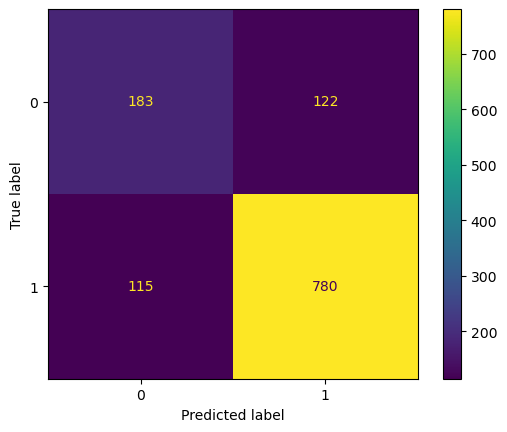

In [127]:
ConfusionMatrixDisplay.from_predictions(y_valid, valid_pred)
plt.show()

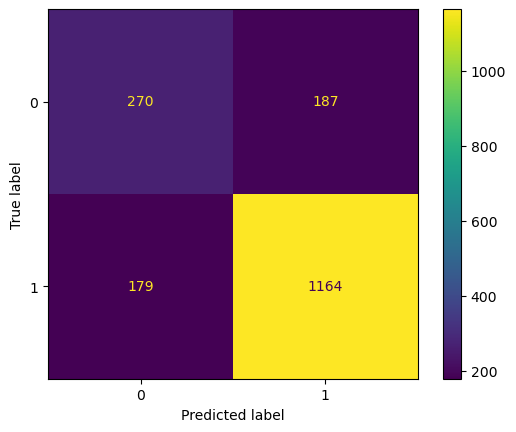

In [128]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)
plt.show()

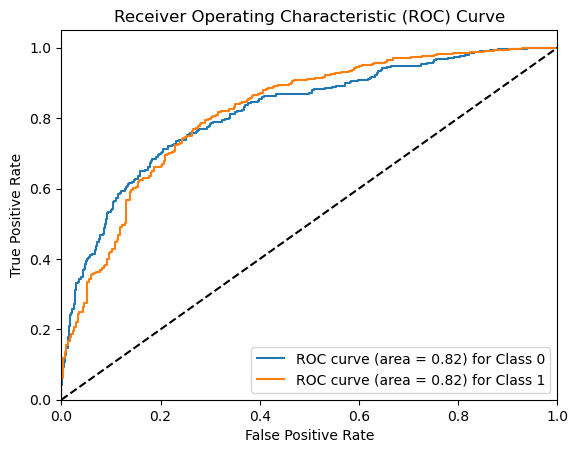

In [132]:
from sklearn.metrics import roc_curve, auc

# Hitung probabilitas prediksi untuk setiap kelas
probs = lr_best.predict_proba(X_valid_tfidf)  # Ganti dengan model yang sesuai

# Inisialisasi list untuk menyimpan nilai FPR, TPR, dan AUC untuk setiap kelas
fpr_list = []
tpr_list = []
roc_auc_list = []

# Loop melalui setiap kelas
for positive_class in range(2):  # Anda memiliki 6 kelas
    # Hitung probabilitas prediksi kelas positif terhadap kelas negatif
    fpr, tpr, thresholds = roc_curve(y_valid == positive_class, probs[:, positive_class])

    # Hitung AUC
    roc_auc = auc(fpr, tpr)
    
    # Tambahkan hasil ke dalam list
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

    # Plot ROC curve untuk setiap kelas
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) for Class {positive_class}')

# Plot garis baseline
plt.plot([0, 1], [0, 1], 'k--')

# Pengaturan plot ROC
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()